# 📊 World Happiness Report - Statistical Data Analysis

**Authors:** Joanna Mackiewicz, Krzysztof Lachs, Kinga Kaza  
**Program:** Artificial Intelligence and Business Process Automation  
**Course:** Statistical Data Analysis  

---


In [3]:
# @title
from IPython.display import display, HTML

pretty_header = """
<div style="
    margin-top: 40px;
    padding: 20px 10px;
    text-align: center;
    font-family: 'Segoe UI', sans-serif;
    color: #2c3e50;
">

    <h1 style="
        font-size: 28px;
        margin-bottom: 10px;
        background: linear-gradient(90deg, #1d70b8, #00a8e8);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-weight: 700;
    ">
        Statistical Data Analysis
    </h1>

    <h2 style="
        font-size: 20px;
        font-weight: 400;
        margin-top: 0;
        color: #555;
    ">
        Kierunek: Artificial Intelligence and Business Process Automation w ujęciu technicznym
    </h2>

    <p style="
        font-size: 16px;
        margin-top: 15px;
    ">
        Projekt słuchaczy studiów podyplomowych
    </p>

    <p style="
        font-size: 16px;
        font-style: italic;
        margin-bottom: 0;
    ">
        Autorzy (kolejność alfabetyczna):
    </p>
    <p style="font-size: 16px; font-weight: 500;">
        Kinga Kaza, Krzysztof Lachs, Joanna Mackiewicz
    </p>
</div>
"""

display(HTML(pretty_header))


## 📚 Table of Contents

1. **Introduction** - Objectives and scope
2. **Import Libraries and Load Data** - Environment setup
3. **Initial Data Diagnostics** - Data structure overview
4. **Data Cleaning and Standardization** - Data preparation for analysis
5. **Exploratory Data Analysis (EDA)** - Statistics and visualizations
6. **Conclusions and Recommendations** - Project summary

---


## 1. Introduction

### 📋 Project Objectives

This project aims to conduct a comprehensive exploratory analysis of data from the **World Happiness Report** covering years 2015-2022. The analysis focuses on:

- **Identifying key factors** affecting happiness levels
- **Comparing regions and countries** in terms of happiness index
- **Analyzing temporal trends** - how happiness levels changed over the years
- **Impact of COVID-19 pandemic** on happiness levels in different world regions

### 📊 Data Source

Data comes from official reports World Happiness Report available at: https://worldhappiness.report/

The report measures happiness levels in different countries based on the following factors:
- **GDP per capita** - GDP per capita
- **Social support** - Social support
- **Healthy life expectancy** - Healthy life expectancy
- **Freedom to make life choices** - Freedom to make life choices
- **Generosity** - Generosity
- **Perceptions of corruption** - Perceptions of corruption

---


## 2. Import Libraries and Load Data

### 📦 Required Libraries

This project uses the following libraries:
- **pandas** - data analysis and manipulation
- **numpy** - numerical operations
- **matplotlib, seaborn** - visualizations
- **plotly** - interactive charts and maps
- **scipy** - statistical functions
- **missingno** - missing data analysis


In [4]:
# Import all required libraries
import pandas as pd                         # data manipulation (DataFrame)
import numpy as np                          # mathematical calculations and arrays
import matplotlib.pyplot as plt             # create charts
import seaborn as sns                       # visualizations
import scipy.stats as stats                 # statitistics
import math                                 # mathematical functions
import kagglehub                            # downlaoad dataset from kaggle
import plotly.express as px                 # interactive visuals
from matplotlib.ticker import MaxNLocator   
from scipy.stats.mstats import winsorize    # winsorize

import warnings
warnings.filterwarnings('ignore')


path = kagglehub.dataset_download("mathurinache/world-happiness-report") # Zaimportowanie ramek danych z Kaggle
print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'seaborn'

### 📁 Load Data

We load data from CSV files for years 2015-2022 and create a dictionary `dfs` containing separate DataFrames for each year.


In [ ]:

years = range(2015, 2023)       # Create year range from 2015 to 2022
dfs = {}                        # Empty dict for datasets for each year

for year in years:
    dfs[year] = pd.read_csv(f"{path}/{year}.csv")


---

## 3. Initial Data Diagnostics

### 🔍 Data structure overview

We check basic information about the data: shape, column names, data types and descriptive statistics.


### 📊 Missing Data Matrix

We visualize missing data for all years to identify data completeness issues.


📈 Brak danych – rok 2015


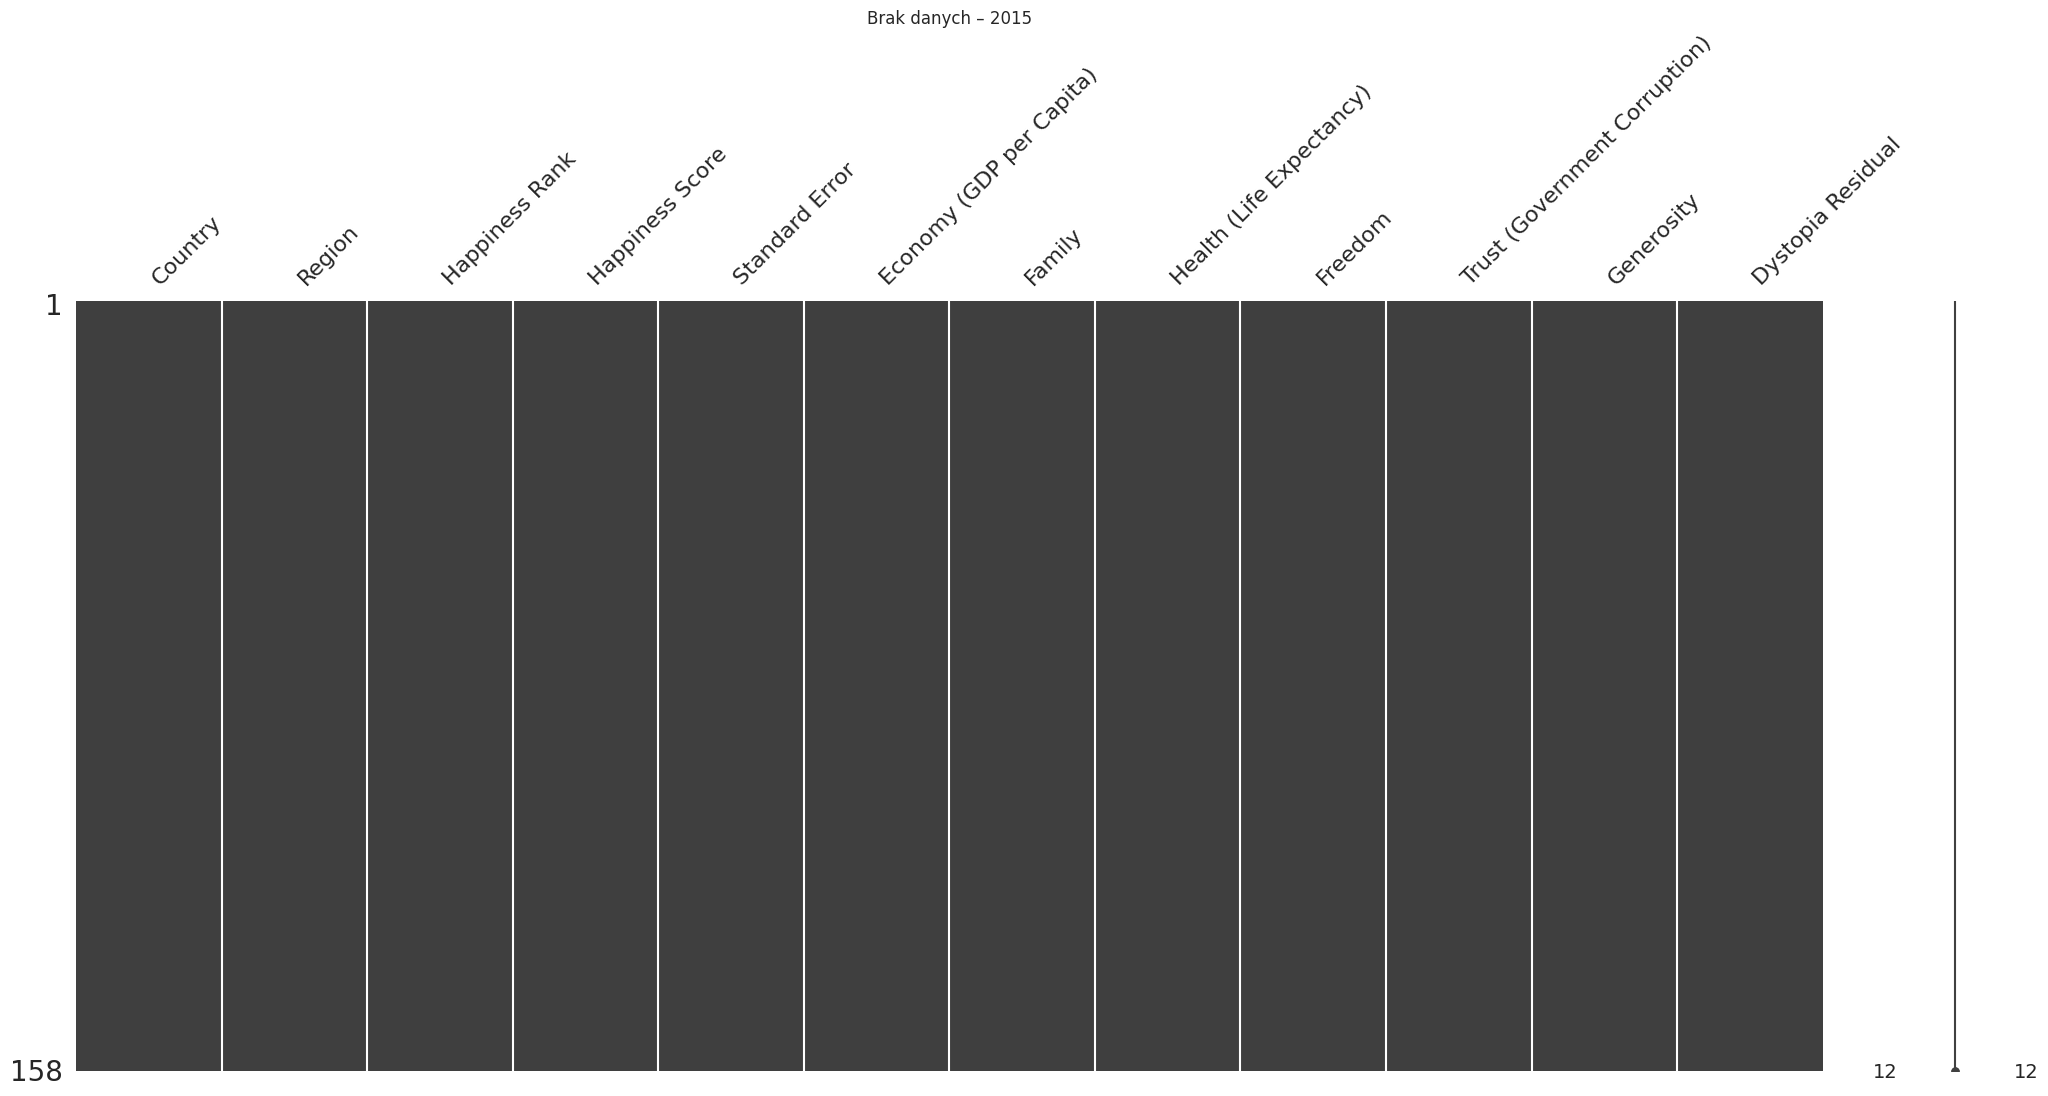

📈 Brak danych – rok 2016


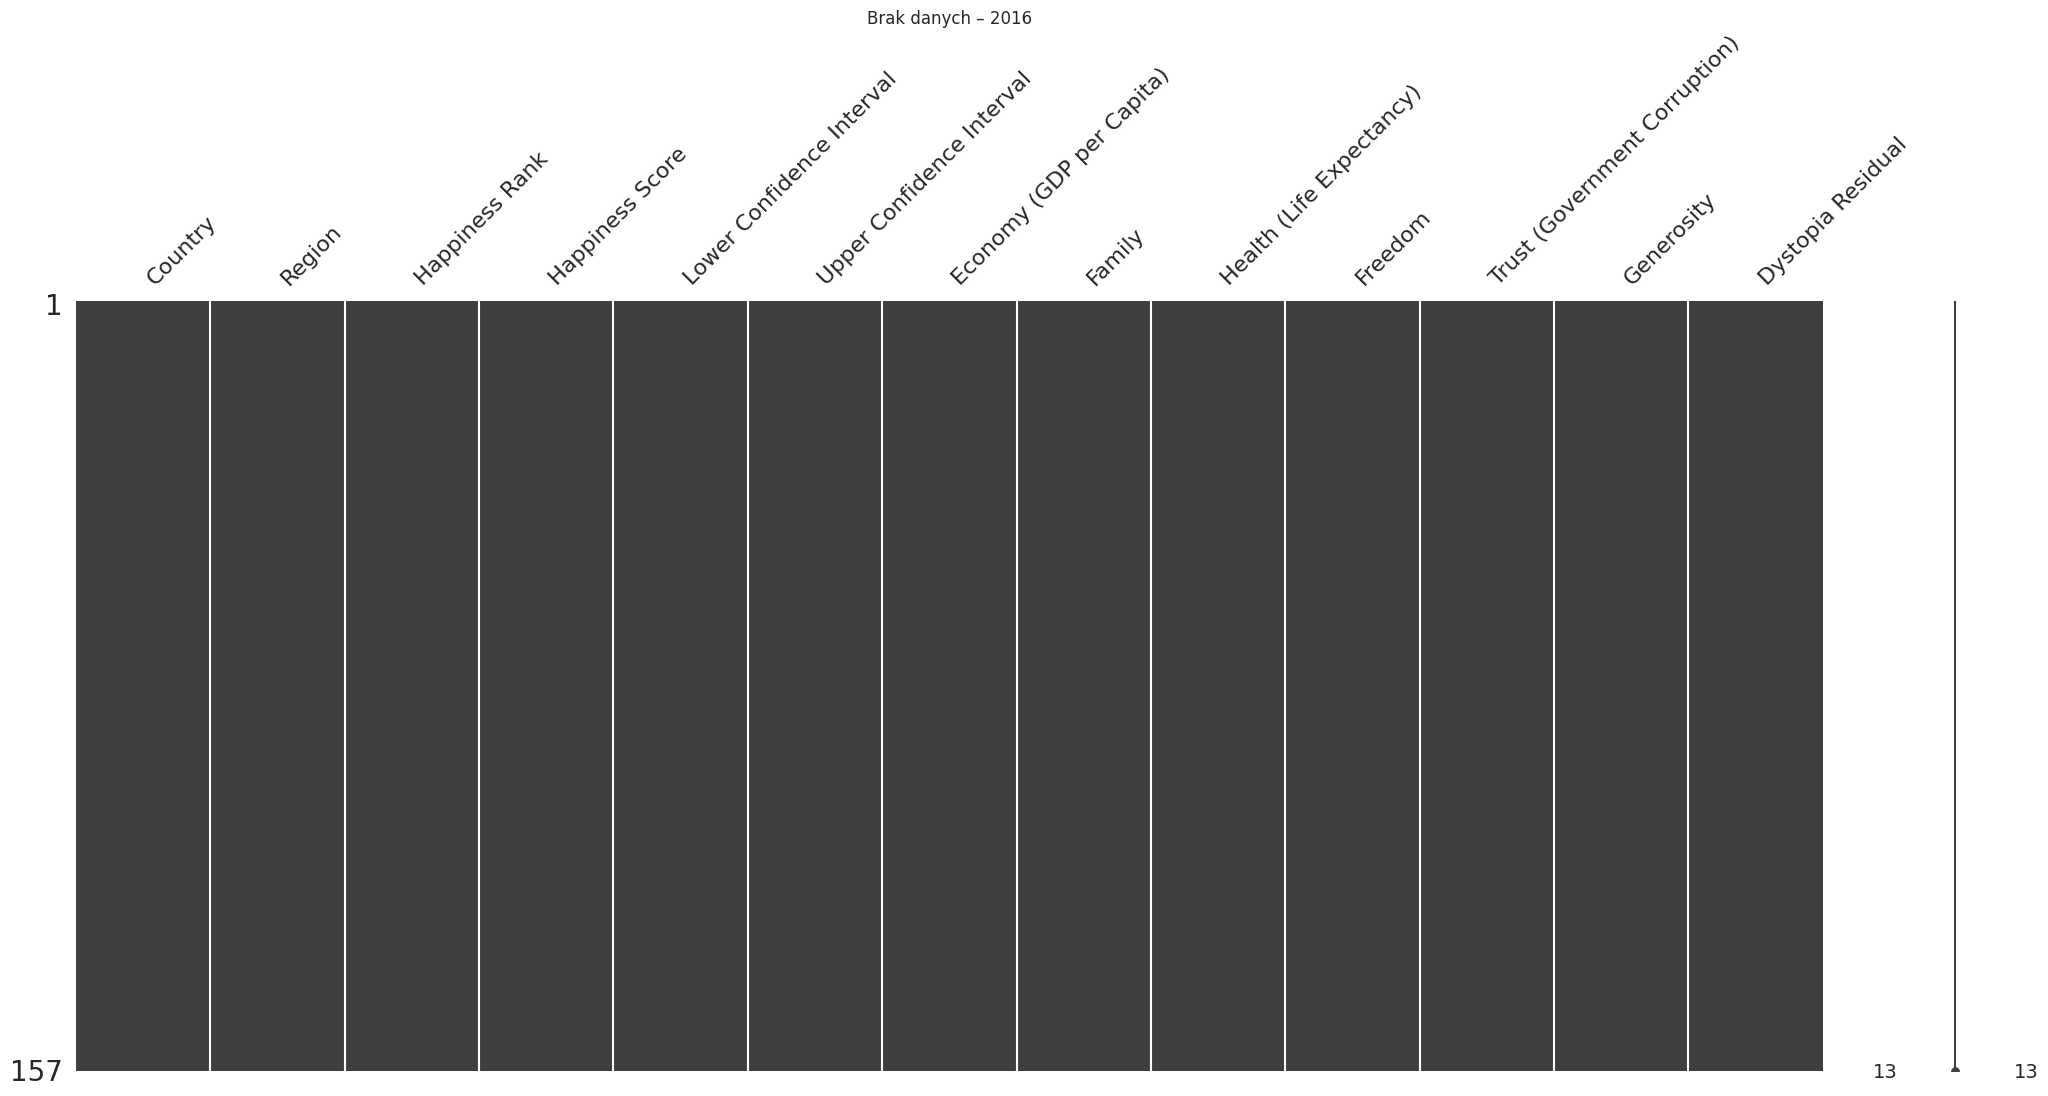

📈 Brak danych – rok 2017


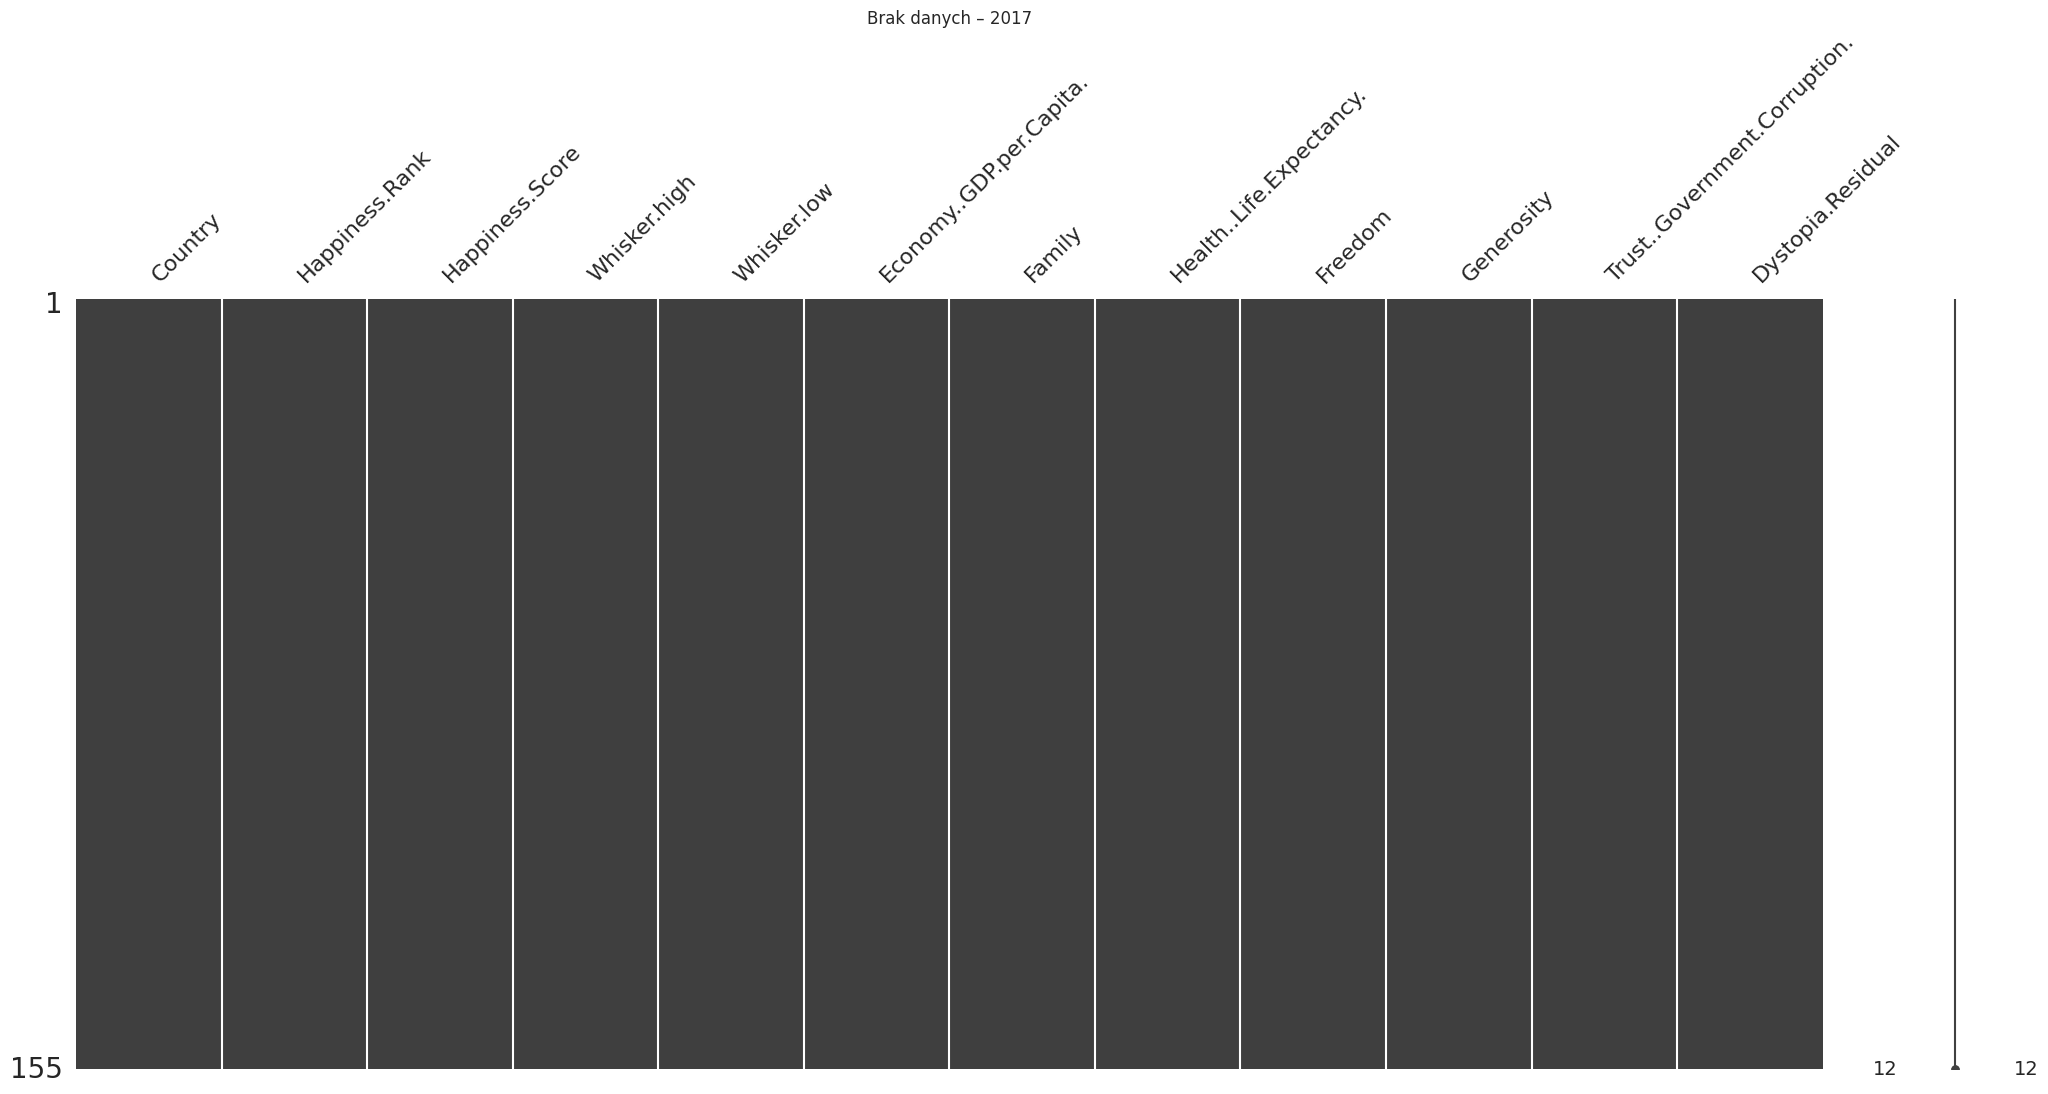

📈 Brak danych – rok 2018


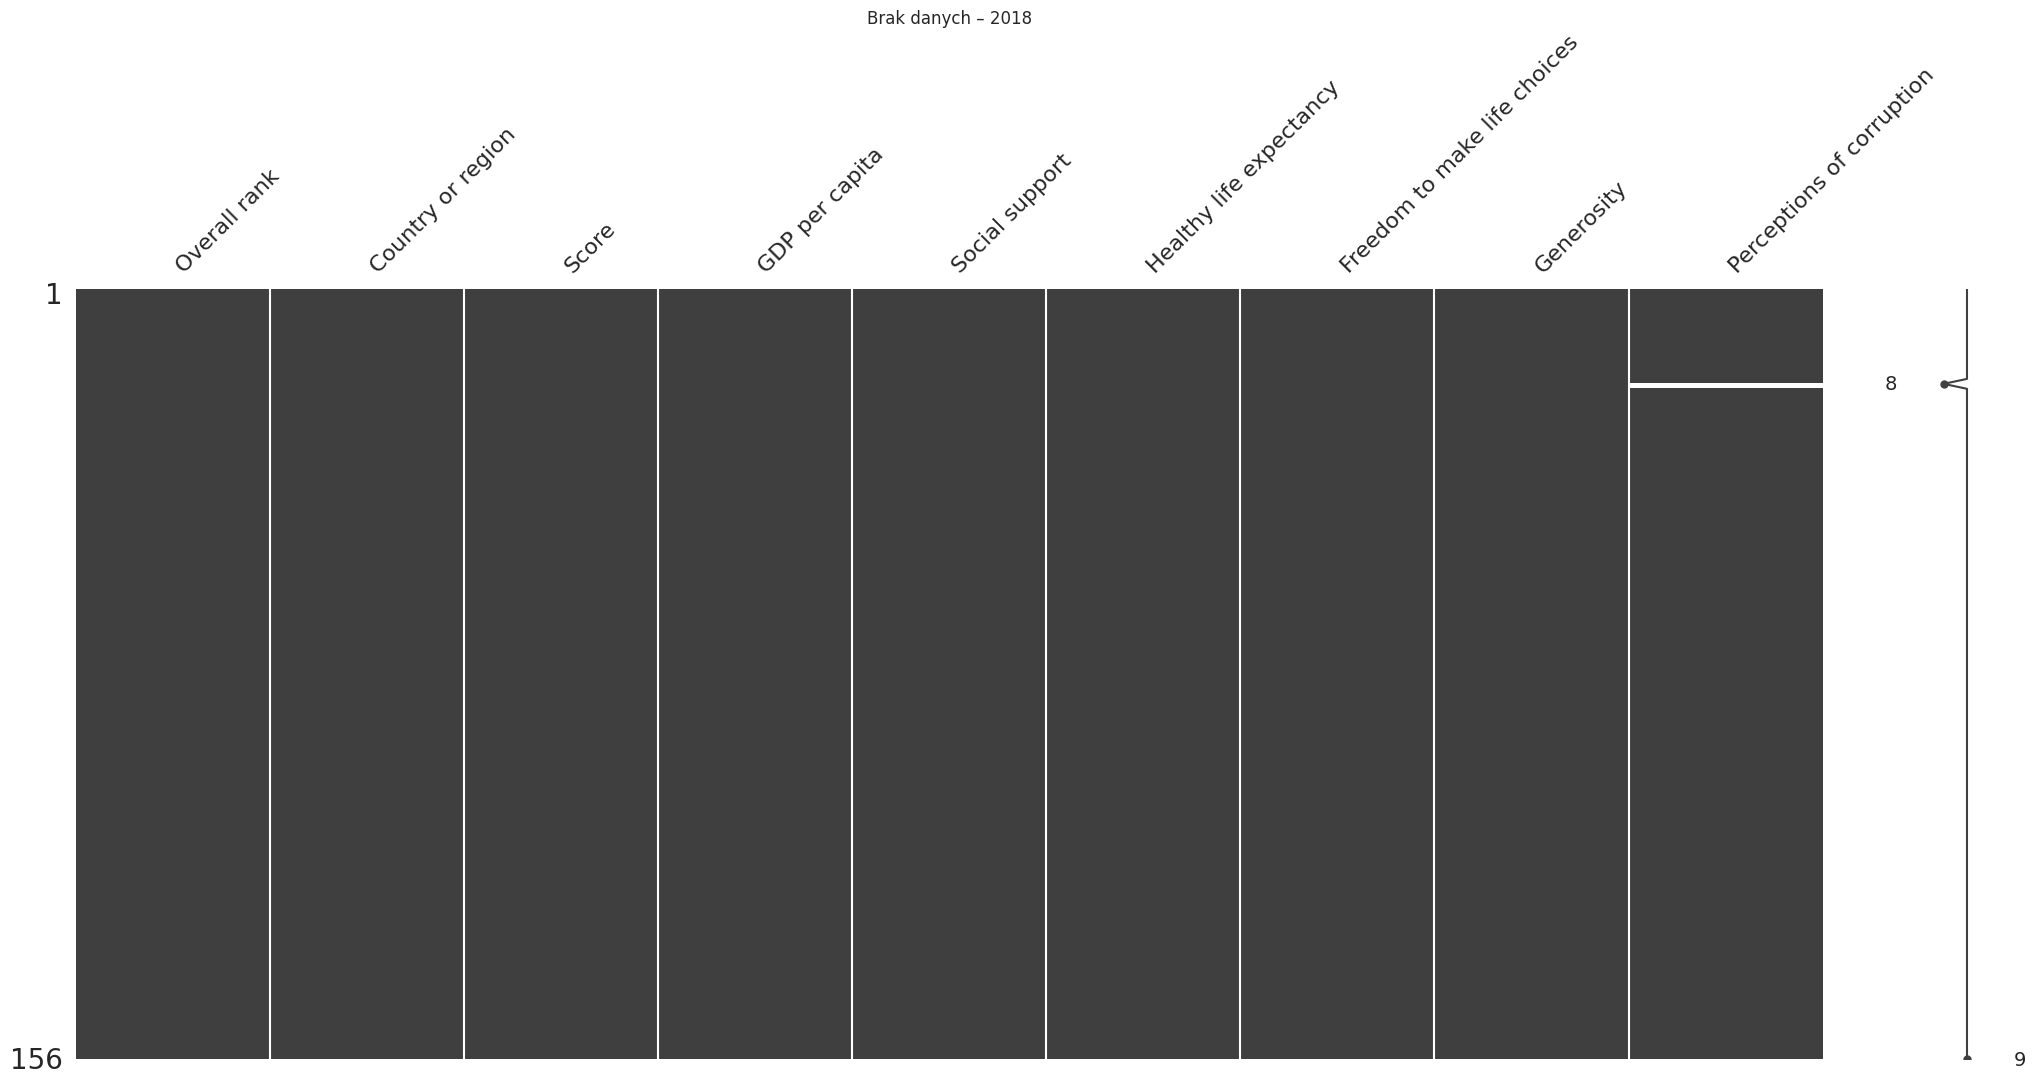

📈 Brak danych – rok 2019


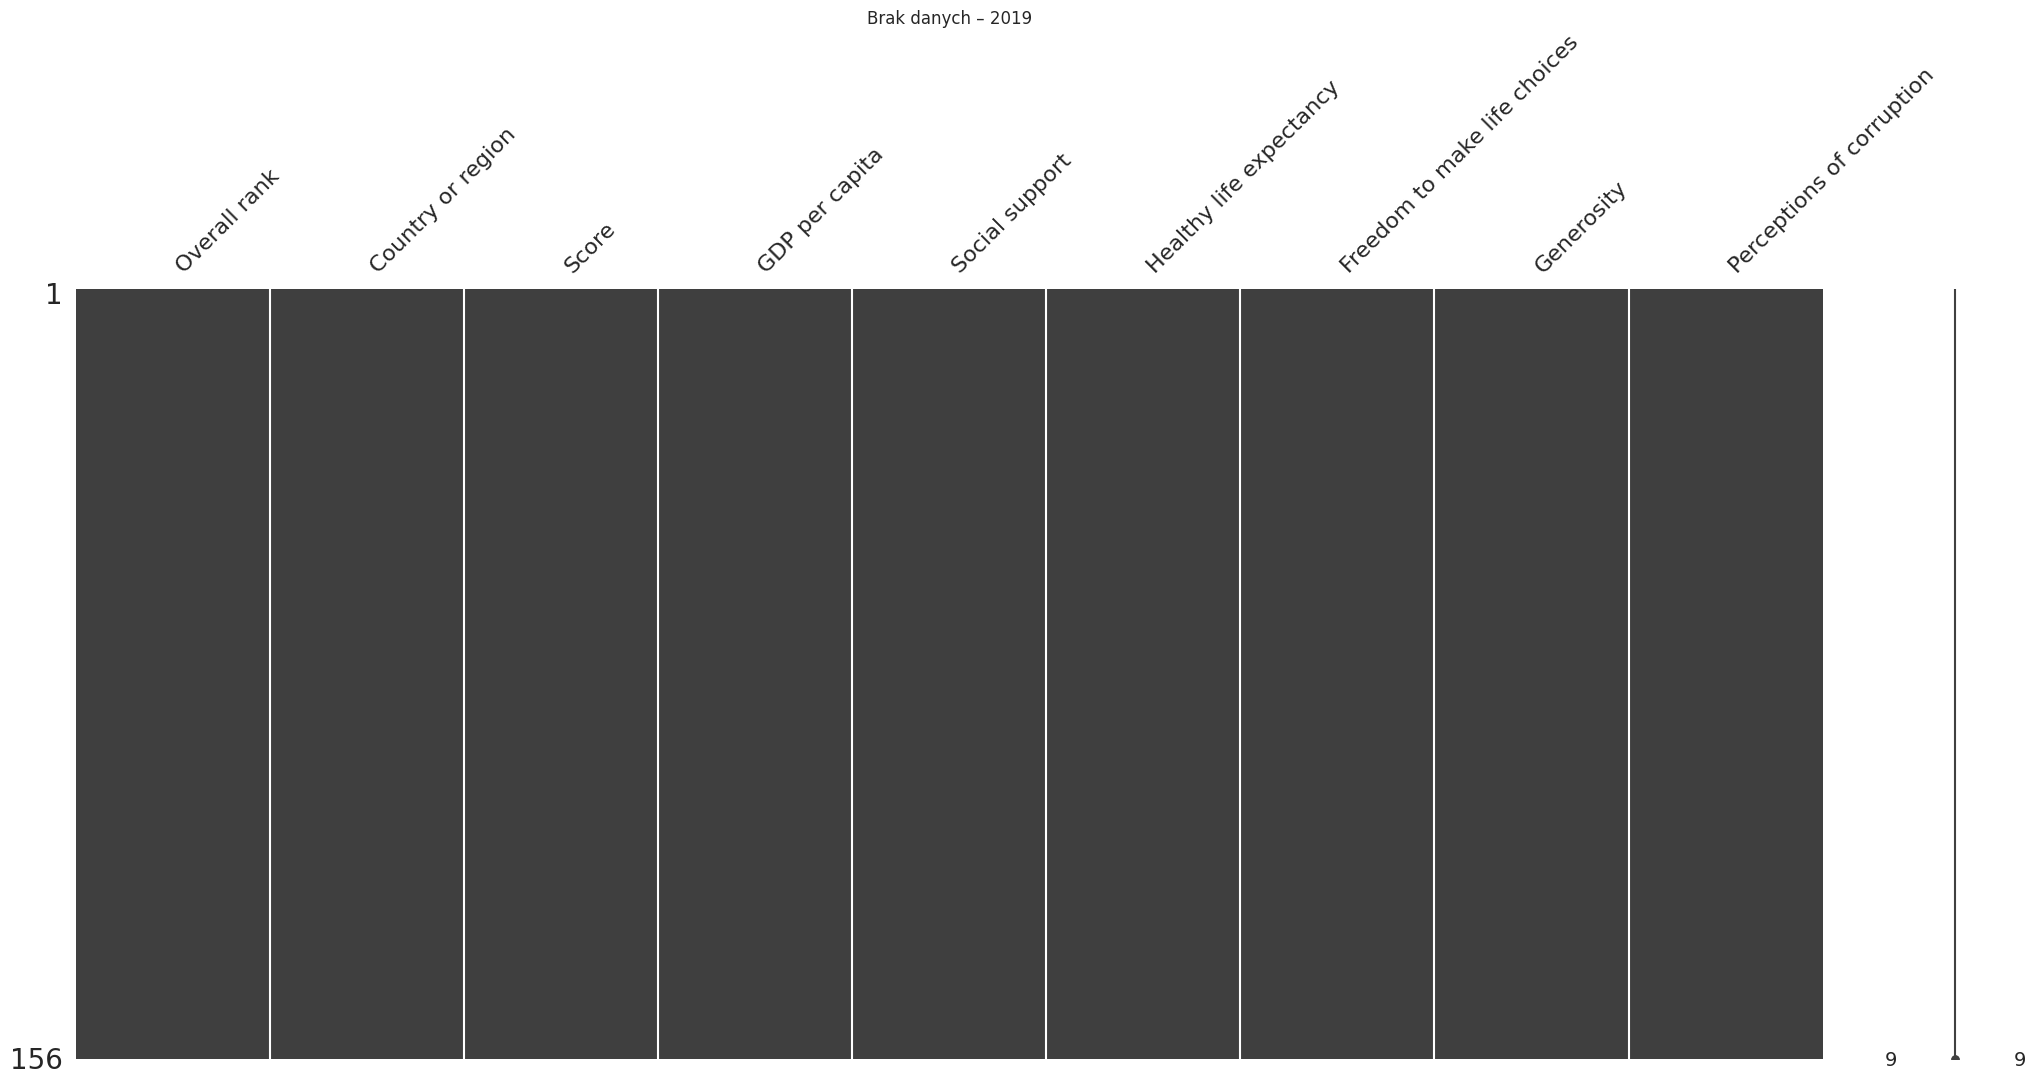

📈 Brak danych – rok 2020


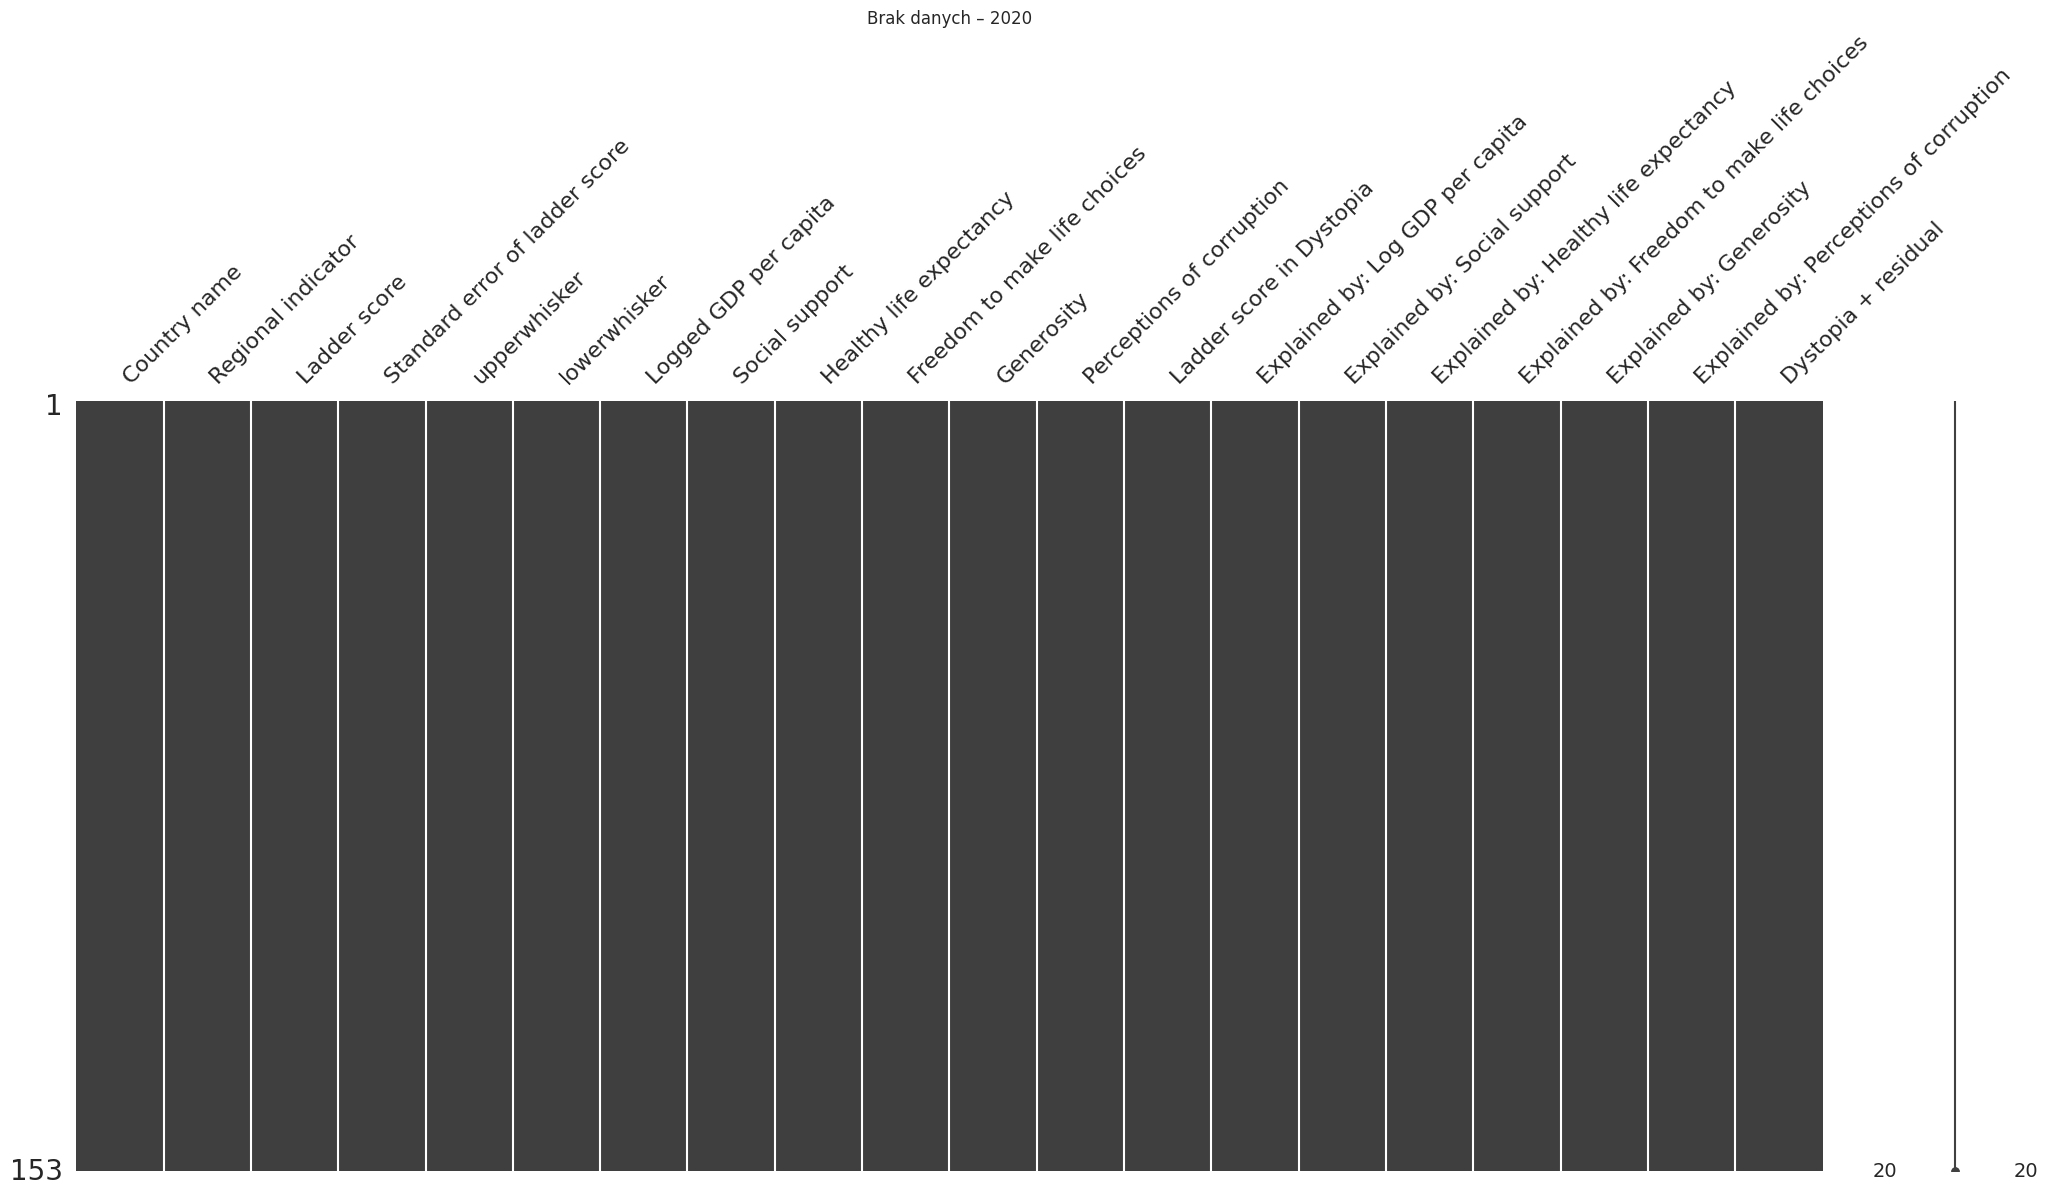

📈 Brak danych – rok 2021


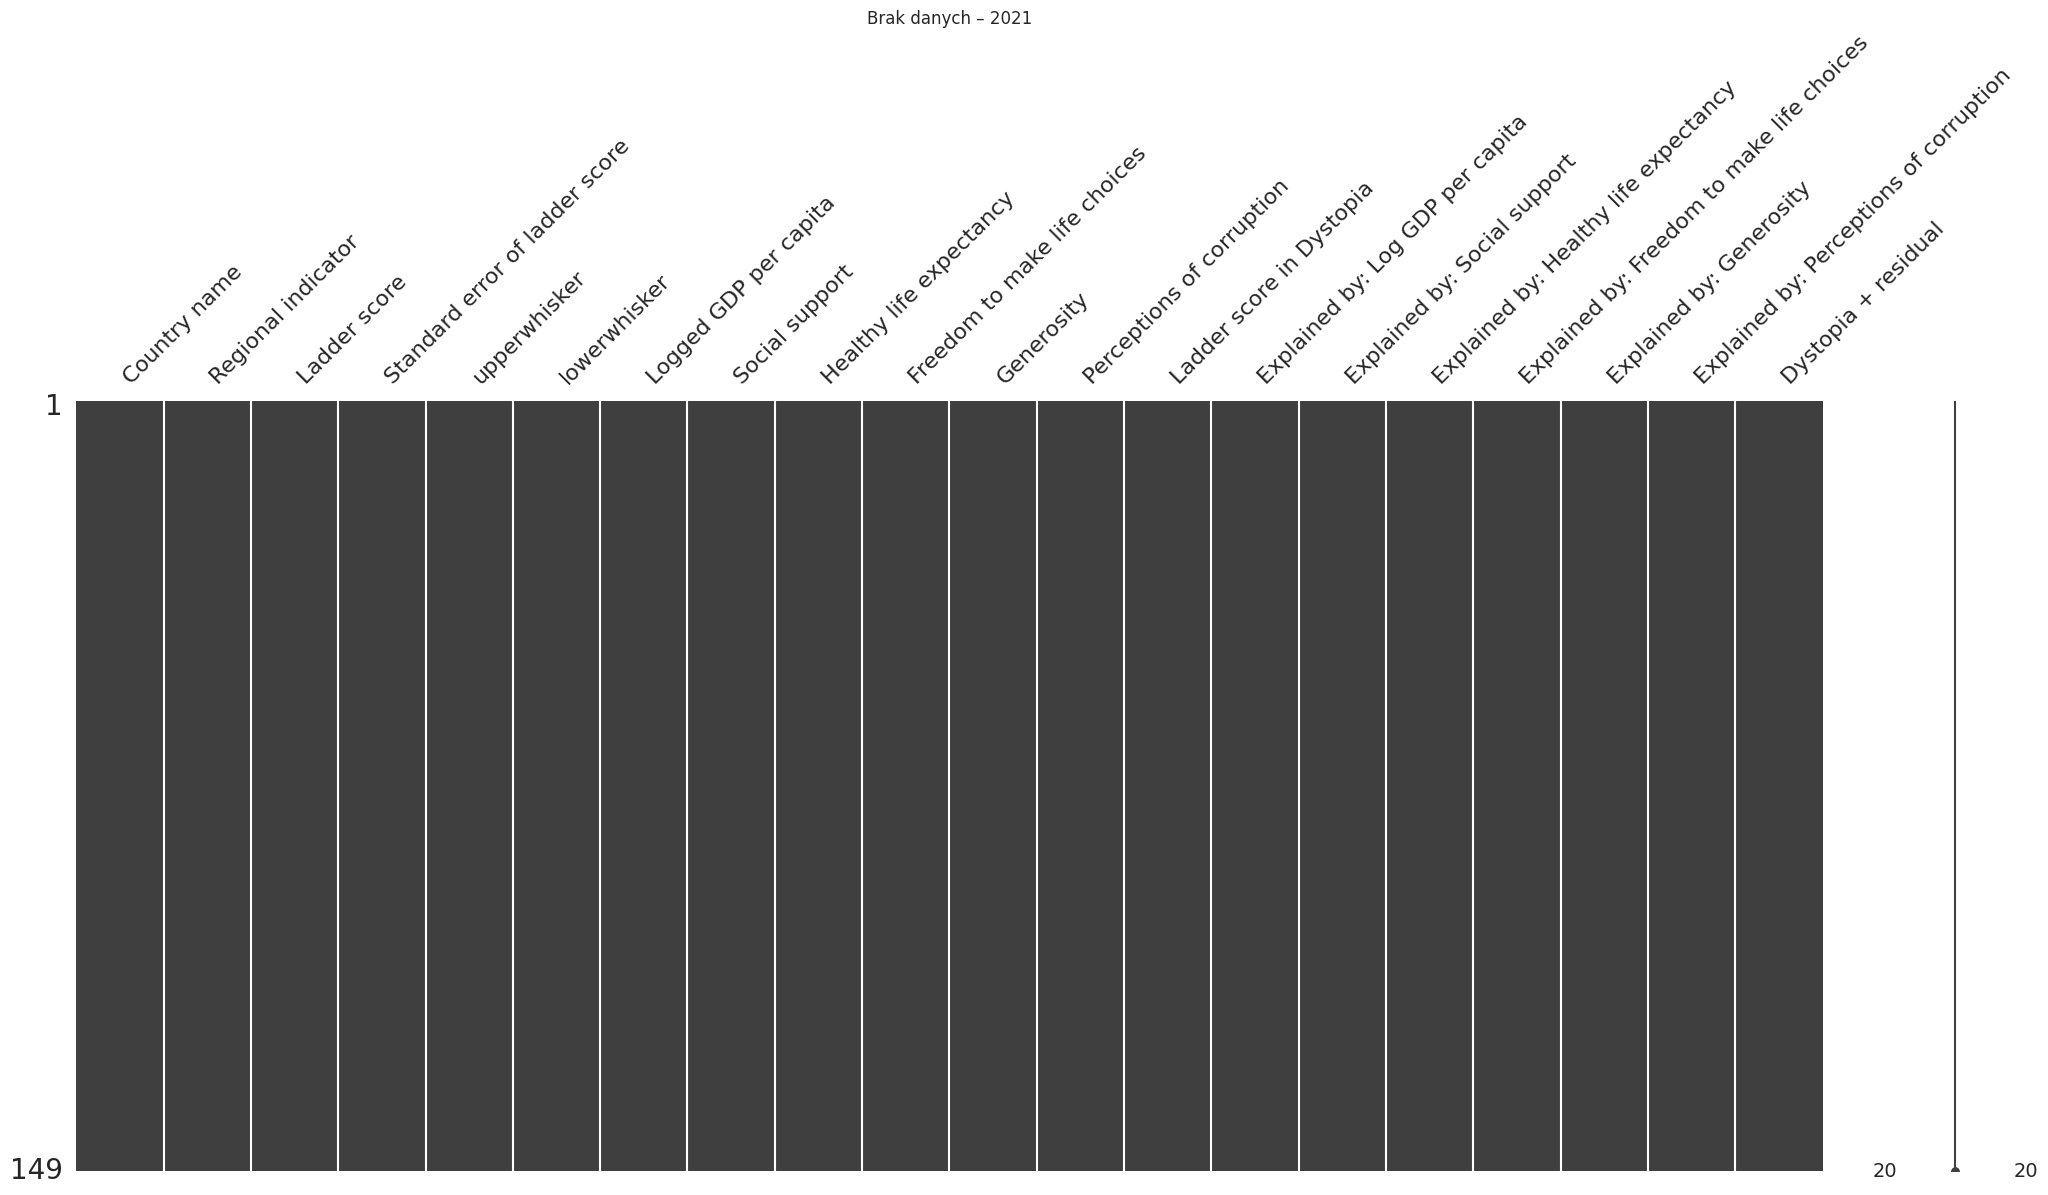

📈 Brak danych – rok 2022


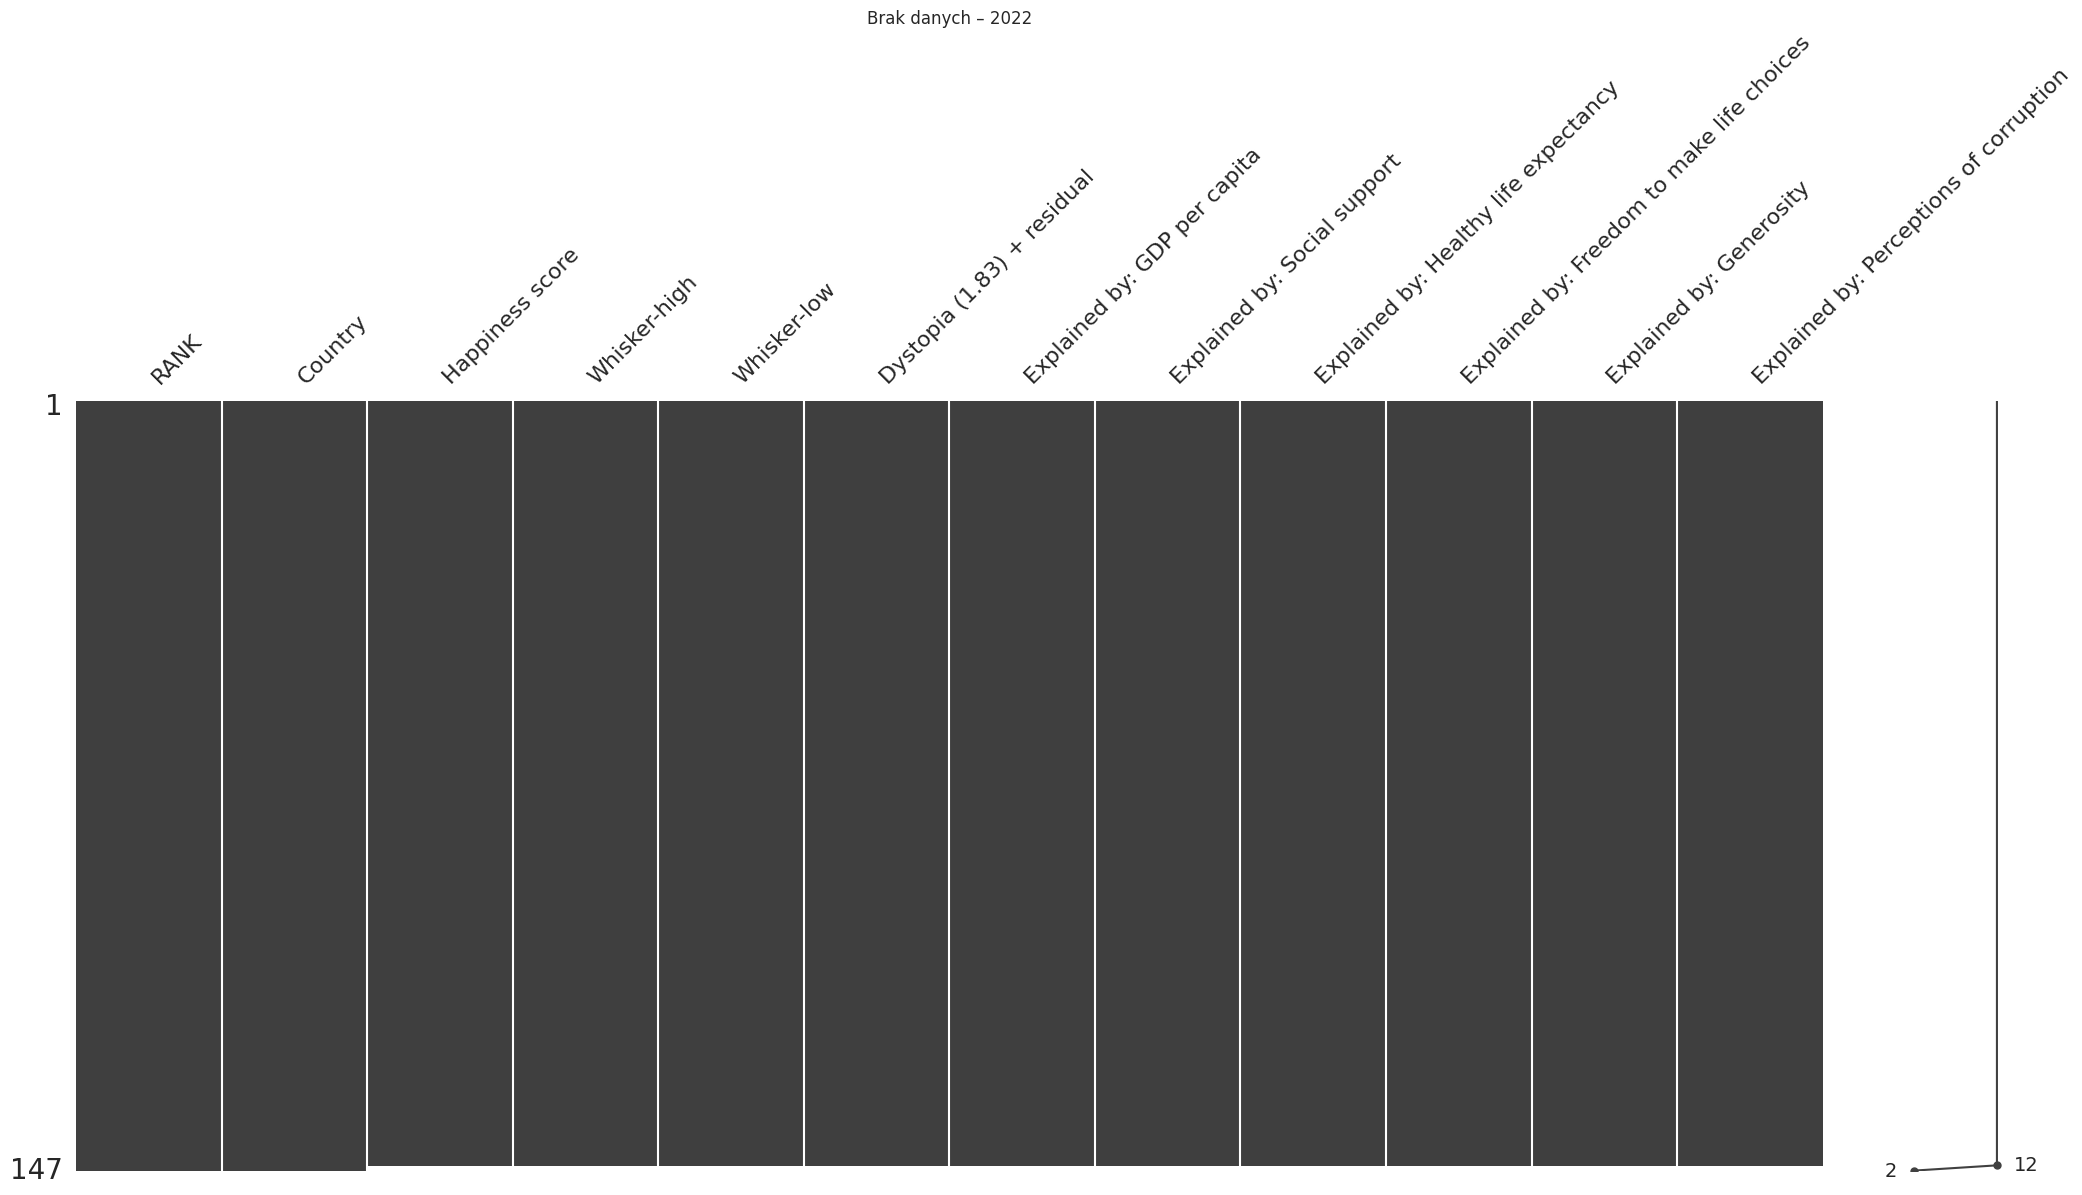

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt


# Iteration over years to visualize missing data
for year in sorted(dfs.keys()):
    df = dfs[year]
    print(f"📈 Missing data – rok {year}")

    # Matrix for data gaps
    msno.matrix(df)
    plt.title(f"Missing data – {year}")
    plt.show()

---

## 4. Data Cleaning and Standardization

### 🔧 Column Name Standardization

Data from different years have different column names. We create a mapping that standardizes column names across all datasets.


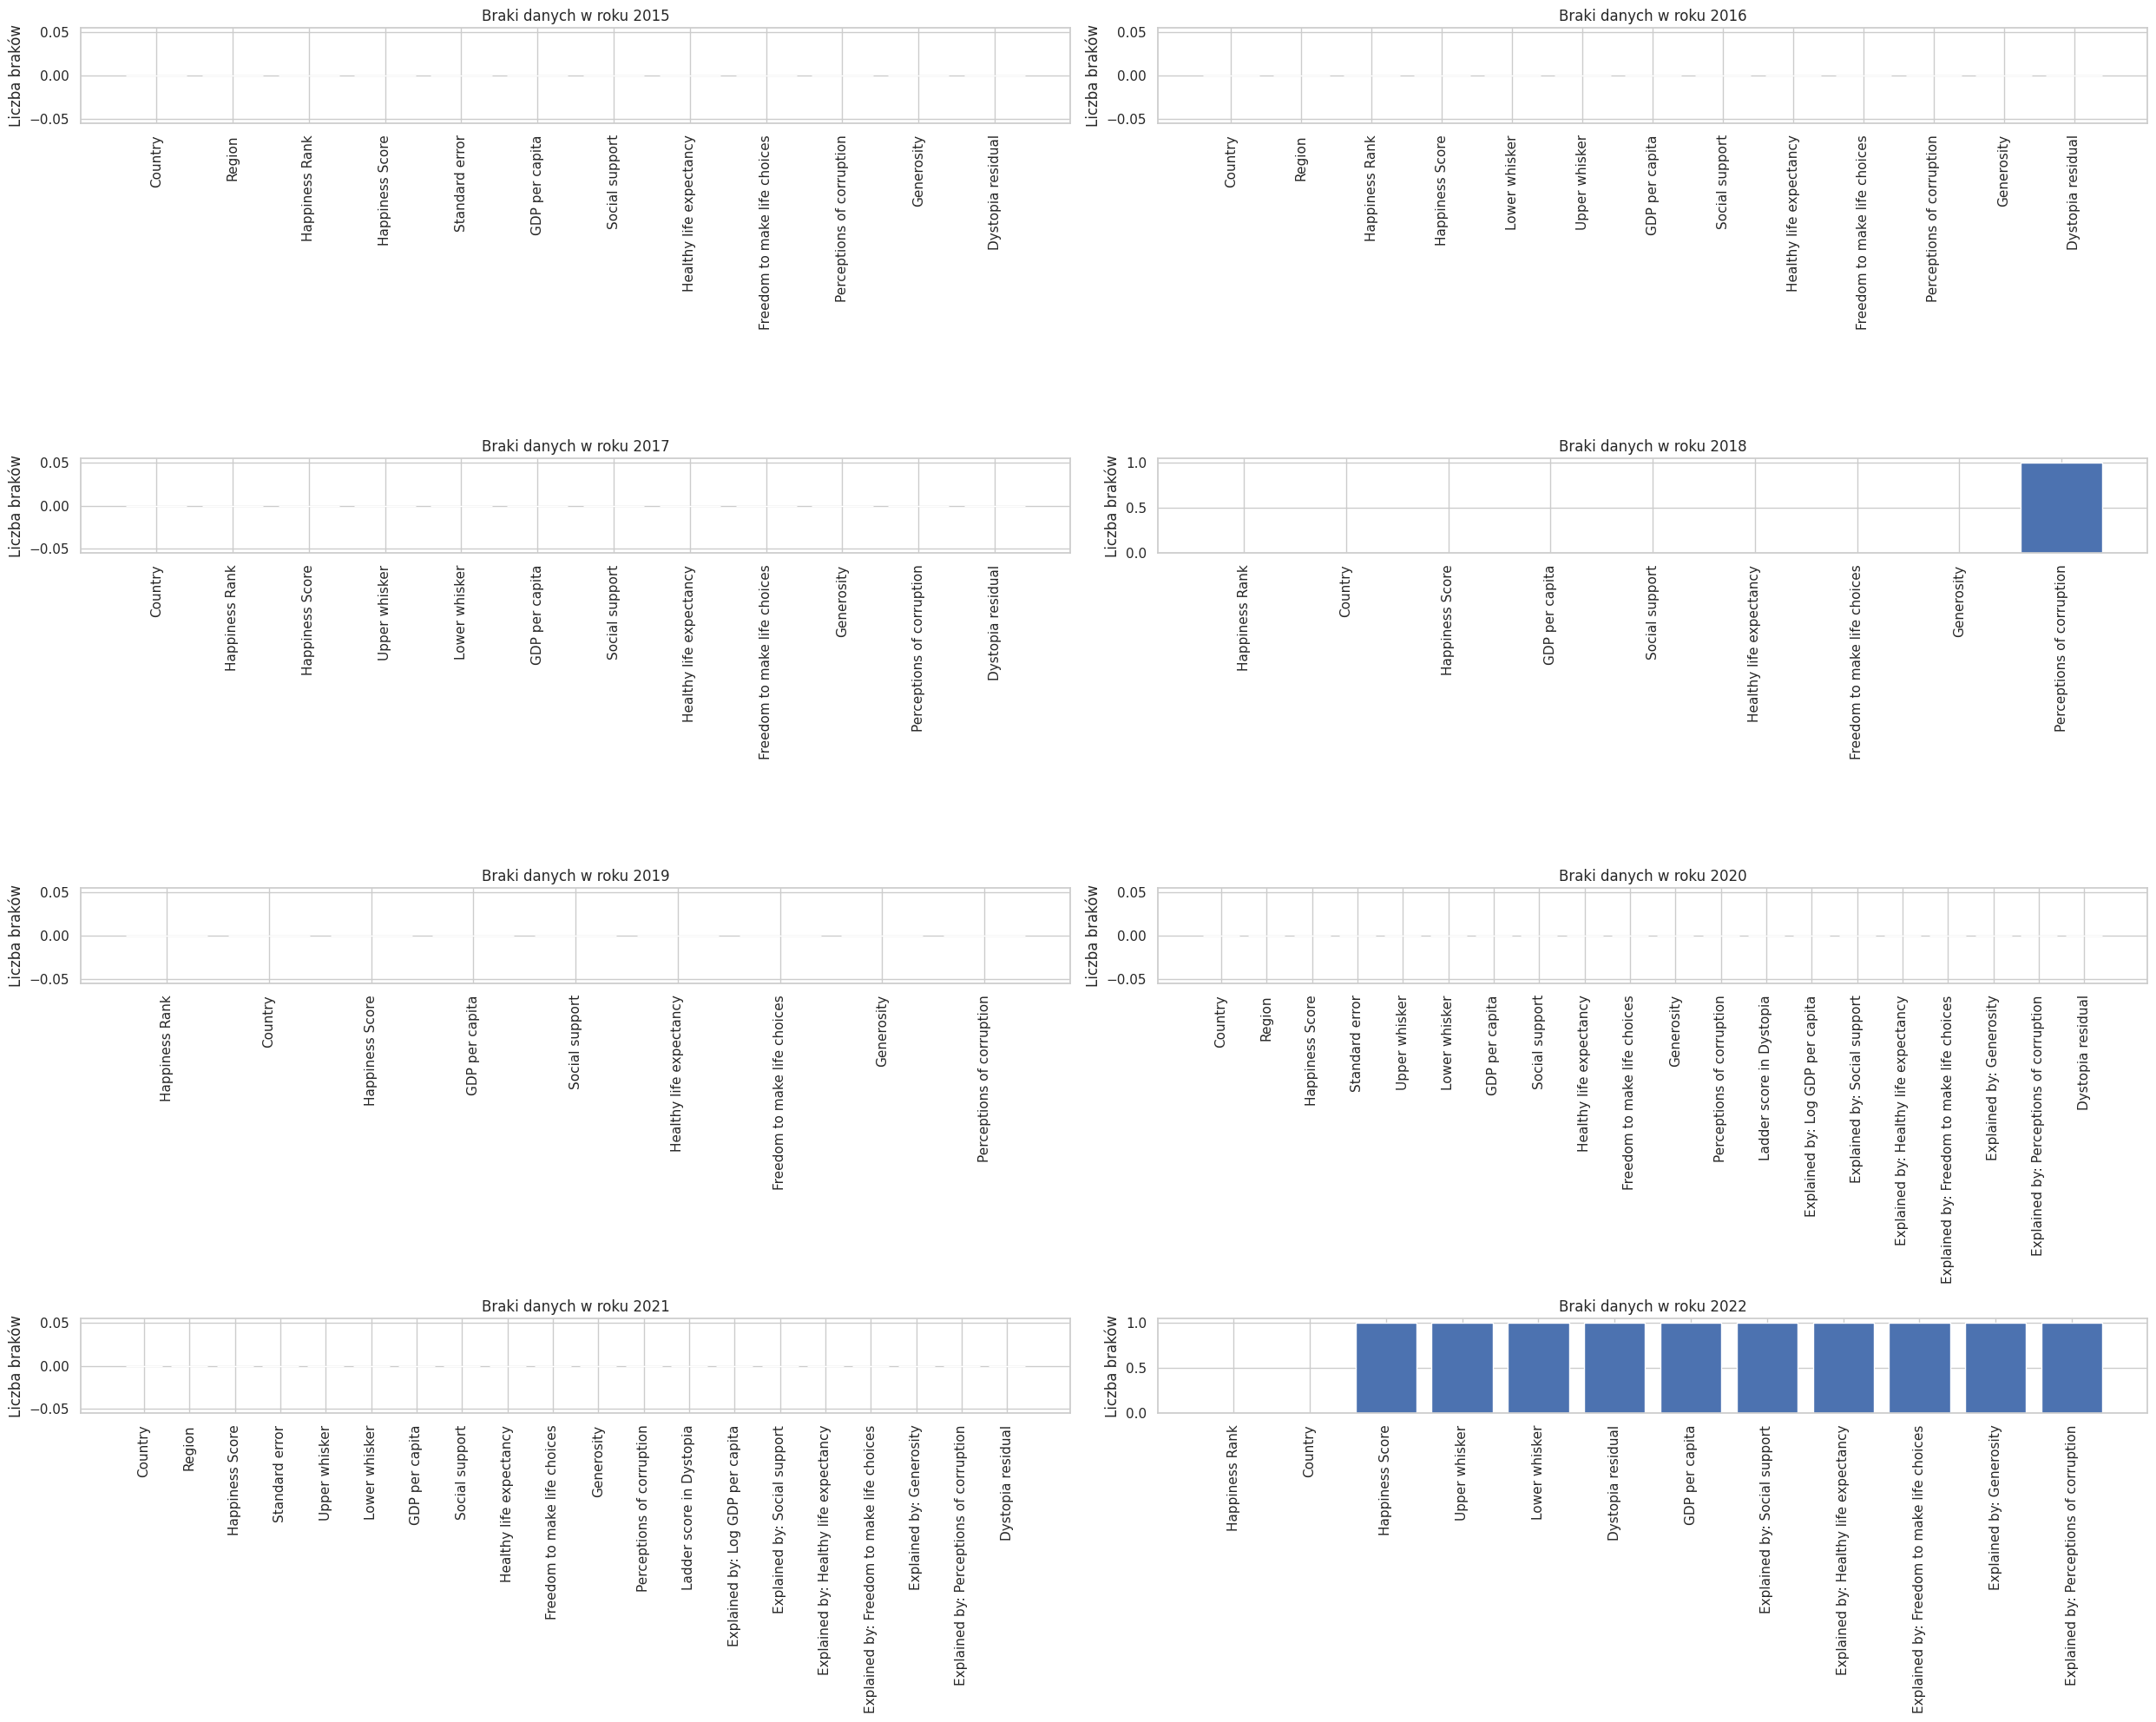

In [ ]:
mapa_columns = {
    # Countries and regions
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankings and scores
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




# Utworzenie wykresów subplotów
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()

# Iteracja po posortowanych latach
for i, year in enumerate(sorted(dfs.keys())):
    df = dfs[year].rename(columns=mapa_columns)  # Ujednolicenie nazw columns
    null_counts = df.isnull().sum()

    axes[i].bar(null_counts.index, null_counts.values)
    axes[i].set_title(f'Braki danych w roku {year}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel("Liczba gaps")

plt.tight_layout()
plt.show()



### 🔄 Apply Column Mapping

We apply the mapping to all DataFrames in the dictionary `dfs`.


In [ ]:

for year, df in dfs.items():
    # Change only those columns, that are in the mapping
    renamed_cols = {col: mapa_columns[col] for col in df.columns if col in mapa_columns}
    dfs[year] = df.rename(columns=renamed_cols)

# Check: which columns are available in each year
column_presence = {
    year: sorted([col for col in df.columns if col in mapa_columns.values()])
    for year, df in dfs.items()
}

column_presence


{2015: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Standard error'],
 2016: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Upper whisker'],
 2017: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Social support',
  'Upper whisker'],
 2018: ['Country',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Social support'],
 2019: ['Country',
  'Freedom t

### 🌍 Country Name Standardization

Different reports use different names for the same countries (np. "Hong Kong S.A.R., China" vs "Hong Kong"). We create a mapping that standardizes country names.


In [ ]:

mapa_ujednolicenia_krajow = {
    # Congo variants
    "Congo": "Republic of the Congo",  # assume, że to Brazzaville
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",


    # Hong Kong
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong S.A.R., China": "Hong Kong",

    # Iran
    "Iran (Islamic Republic of)": "Iran",

    # Russia
    "Russia": "Russian Federation",

    # Palestine
    "Palestinian Territories": "Palestine",
    "Palestine": "Palestine",


    # Czech Republic
    "Czechia": "Czech Republic",

    # United States
    "United States": "United States of America",

    # Macedonia
    "North Macedonia": "Macedonia",

    # Taiwan
    "Taiwan Province of China": "Taiwan",

    # Trinidad i Tobago
    "Trinidad & Tobago": "Trinidad and Tobago",

    # Somalia
    "Somaliland region": "Somaliland",
    "Somaliland Region": "Somaliland"
}


for year, df in dfs.items():                                     # Zastosowanie ujednoliconego słownika do wszystkich ramek
    if "Country" in df.columns:
        df["Country"] = df["Country"].replace(mapa_ujednolicenia_krajow)
        dfs[year] = df


dfs[2022].Country.unique()                                      # Weryfikacja na przykładzie 2022


array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States of America', 'United Kingdom', 'Czech Republic',
       'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica',
       'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Singapore',
       'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta',
       'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil',
       'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile',
       'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador',
       'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan',
       'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea',
       'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan',
       'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia',
       'Dominican Republic', 'Malaysia', 'Bolivia', 'Chi

### 🎯 Country Filtering

We select only countries that appear in all years (2015-2021), to ensure temporal analysis consistency.


In [ ]:

zbiory_krajow = {rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items()} # Set of all krajów we wszystkich ramkach

kraje_we_wszystkich_latach = set.intersection(*zbiory_krajow.values()) # Kraje obecne we all yearsach (przecięcie)

wszystkie_kraje = set.union(*zbiory_krajow.values())   # Lista krajów w jakimkolwiek roku (suma zbiorów)

kraje_niekompletne = sorted(wszystkie_kraje - kraje_we_wszystkich_latach) # Kraje nieobecne w co najmniej jednym roku

df_kraje_wszystkie = pd.DataFrame(sorted(kraje_we_wszystkich_latach), columns=["Kraje obecne we all yearsach"]) # Tabela krajów obecnych we all yearsach

df_kraje_brakujace = pd.DataFrame(kraje_niekompletne, columns=["Kraje brakujące w co najmniej jednym roku"]) # Tabela krajów niekompletnych


In [ ]:
# Create dataset, that shows presence of each country in individual years
kraje_unikalne = sorted(set.union(*[set(df["Country"].dropna().unique()) for df in dfs.values()]))

# Create matrix country x year
spojnosc_krajow_df = pd.DataFrame(index=kraje_unikalne, columns=dfs.keys())

# Fill True/False
for rok, df in dfs.items():
    obecne_kraje = set(df["Country"].dropna().unique())
    spojnosc_krajow_df[rok] = spojnosc_krajow_df.index.isin(obecne_kraje)

# Identify countries which are available in only one year
kraje_tylko_w_jednym_roku = spojnosc_krajow_df.sum(axis=1)
kraje_tylko_w_jednym_roku = kraje_tylko_w_jednym_roku[kraje_tylko_w_jednym_roku == 1].index.tolist()

# Long format to indicate missing countries per year
braki = spojnosc_krajow_df[~spojnosc_krajow_df].stack().reset_index()
braki.columns = ["Country", "Year", "Brakuje"]

kraje_tylko_w_jednym_roku


['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']

In [ ]:
spojnosc_krajow_df.loc[['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']]

,2015,2016,2017,2018,2019,2020,2021,2022
Djibouti,True,False,False,False,False,False,False,False
"Eswatini, Kingdom of",False,False,False,False,False,False,False,True
Oman,True,False,False,False,False,False,False,False
Puerto Rico,False,True,False,False,False,False,False,False


In [ ]:
# Based on dadata from df `spojnosc_krajow_df`, we calculate how many years missing każdemu krajowi
liczba_brakow = spojnosc_krajow_df.apply(lambda row: (~row).sum(), axis=1)

# Countries which have exactly 1 missing year
kraje_z_1_brakiem = liczba_brakow[liczba_brakow == 1].index.tolist()

# In which years these countries are missing
braki_dla_krajow_1 = braki[braki["Country"].isin(kraje_z_1_brakiem)].sort_values(by=["Country", "Year"])


In [ ]:
# Filter data identifying countries with complete data (no missing years)
kraje_stale = spojnosc_krajow_df.index[spojnosc_krajow_df.all(axis=1)].tolist()

# Union of stable countries and those with only one missing year
kraje_do_analizy = sorted(set(kraje_stale).union(set(kraje_z_1_brakiem)))

# Country DataFrame with final list of countries for analysis
df_kraje_do_analizy = pd.DataFrame(kraje_do_analizy, columns=["Kraje do analizy"])


In [ ]:
df_kraje_do_analizy

,Kraje do analizy
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
...,...
139,Venezuela
140,Vietnam
141,Yemen
142,Zambia


In [ ]:
# Filtering
dfs_kraje_z_1_brakiem = {
    rok: df[df["Country"].isin(kraje_z_1_brakiem)].copy()
    for rok, df in dfs.items()
}

# Łączymy all years w jeden DataFrame for tych krajów
df_kraje_z_1_brakiem = pd.concat(dfs_kraje_z_1_brakiem.values(), ignore_index=True)


NameError: name 'dfs' is not defined

### 📋 Creating Final DataFrame

We combine all cleaned data into one DataFrame `df_final` with columns in standardized order.


In [ ]:
# Lista docelowych columns we właściwej kolejności
columns_docelowe_finalne = [
    "Year", "Country", "Happiness Rank", "Happiness Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption"
]

# Przeniesienie danych z uwzględnieniem columns w odpowiedniej kolejności
finalne_dane = []
for rok, df in dfs.items():
    df_filtr = df[df["Country"].isin(kraje_do_analizy)].copy()
    df_filtr["Year"] = rok
    df_filtr = df_filtr[[col for col in columns_docelowe_finalne if col in df_filtr.columns]]
    finalne_dane.append(df_filtr)

# Concat i ustawienie kolejności columns
df_final = pd.concat(finalne_dane, ignore_index=True)
df_final = df_final[columns_docelowe_finalne]

NameError: name 'dfs' is not defined

In [ ]:
df_final

,Year,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2015,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,4.0,7.522,1.459,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...
1141,2022,Botswana,142.0,"3,471","1,503",NaN,NaN,NaN,NaN,NaN
1142,2022,Rwanda,143.0,"3,268","0,785",NaN,NaN,NaN,NaN,NaN
1143,2022,Zimbabwe,144.0,"2,995","0,947",NaN,NaN,NaN,NaN,NaN
1144,2022,Lebanon,145.0,"2,955","1,392",NaN,NaN,NaN,NaN,NaN


In [ ]:
# Region mapping
region_map = dfs[2021][["Country", "Region"]].drop_duplicates()
region_map.columns = ["Country", "Region"]  # standaryzacja nazw columns


# Dodanie columns z 'Region' przez merge
df_final = pd.merge(df_final, region_map, on="Country", how="left")

# Umieszczanie columns 'Region' bezpośrednio po 'Country'
cols = df_final.columns.tolist()
cols.remove("Region")
insert_pos = cols.index("Country") + 1
cols.insert(insert_pos, "Region")
df_final = df_final[cols]


In [ ]:
# Lokaliowanie values niebędących liczbami typu float w dwóch kluczowych columnsach
problematic_cols = ["Happiness Score", "GDP per capita"]

# Znalezenie niepoprawnych values (np. zawierające przecinek)
for col in problematic_cols:
    print(f"\nNiepoprawne values w columnsie '{col}':")
    print(df_final[df_final[col].apply(lambda x: isinstance(x, str) and "," in x)][[col]].head())

# Zastosowanie Konwersji poprzez zamianę kropek na przecinki i konwersja na float
for col in problematic_cols:
    df_final[col] = df_final[col].apply(
        lambda x: float(x.replace(",", ".")) if isinstance(x, str) and "," in x else x
    )


Niepoprawne wartości w kolumnie 'Happiness Score':
     Happiness Score
1004           7,821
1005           7,636
1006           7,557
1007           7,512
1008           7,415

Niepoprawne wartości w kolumnie 'GDP per capita':
     GDP per capita
1004          1,892
1005          1,953
1006          1,936
1007          2,026
1008          1,945


### 🌐 Complete Region Information

We fill in missing region information for countries.


In [ ]:
# Region mapping
region_map = dfs[2021][["Country", "Region"]].drop_duplicates()
region_map.columns = ["Country", "Region"]  # standaryzacja nazw columns


# Dodanie columns z 'Region' przez merge
df_final = pd.merge(df_final, region_map, on="Country", how="left")

# Umieszczanie columns 'Region' bezpośrednio po 'Country'
cols = df_final.columns.tolist()
cols.remove("Region")
insert_pos = cols.index("Country") + 1
cols.insert(insert_pos, "Region")
df_final = df_final[cols]


In [ ]:
df_final_no2022 = df_final[df_final["Year"] != 2022].copy()

In [ ]:

mask_missing = (                                                # Znalezienie wiersza z brakiem w "Perceptions of corruption"
    (df_final_no2022["Country"] == "United Arab Emirates") &
    (df_final_no2022["Year"] == 2018)
)

In [ ]:
# Pobranie regionu for brakującego wiersza
region_missing = df_final_no2022.loc[mask_missing, "Region"].values[0]

# Obliczenie średniej z regionu (bez gaps)
regional_mean = df_final_no2022[
    (df_final_no2022["Region"] == region_missing) &
    (df_final_no2022["Perceptions of corruption"].notnull())
]["Perceptions of corruption"].mean()

# Zaokrąglenie do 5 miejsc po przecinku
regional_mean = round(regional_mean, 5)

# Imputacja
df_final_no2022.loc[mask_missing, "Perceptions of corruption"] = regional_mean

# Sprawdzenie, czy brak został uzupełniony
missing_after = df_final_no2022["Perceptions of corruption"].isnull().sum()

In [ ]:
df_final_no2022.loc[df_final_no2022["Country"] == "United Arab Emirates"]

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,2015,United Arab Emirates,Middle East and North Africa,20.0,6.9010,1.427270,1.125750,0.809250,0.641570,0.264280,0.385830
169,2016,United Arab Emirates,Middle East and North Africa,28.0,6.5730,1.573520,0.871140,0.729930,0.562150,0.265910,0.355610
305,2017,United Arab Emirates,Middle East and North Africa,21.0,6.6480,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490
447,2018,United Arab Emirates,Middle East and North Africa,20.0,6.7740,2.096000,0.776000,0.670000,0.284000,0.186000,0.311390
592,2019,United Arab Emirates,Middle East and North Africa,21.0,6.8250,1.503000,1.310000,0.825000,0.598000,0.262000,0.182000
736,2020,United Arab Emirates,Middle East and North Africa,21.0,6.7908,11.109999,0.849181,67.082787,0.941346,0.123451,0.594502
884,2021,United Arab Emirates,Middle East and North Africa,25.0,6.5610,11.085000,0.844000,67.333000,0.932000,0.074000,0.589000


In [ ]:
# Upraszczamy nazwe naszej finalnej ramki danych
df = df_final_no2022.copy()

### 📝 Dataset Finalization

We create the final version of the dataset `df` ready for analysis, excluding year 2022 (missing key variables).


In [ ]:
# Upraszczamy nazwe naszej finalnej ramki danych
df = df_final_no2022.copy()

In [ ]:
# Podstawowe informacje o finalnym datasecie
print('='*80)
print('FINAL DATASET - SUMMARY')
print('='*80)
print(f'\n📊 Dimensions: {df.shape}')
print(f'📅 Years: {sorted(df["Year"].unique())}')
print(f'🌍 Number of countries: {df["Country"].nunique()}')
print(f'🗺️ Number of regions: {df["Region"].nunique()}')
print(f'\n📋 Columns: {list(df.columns)}')
print(f'\n⚠️ Missing data:')
print(df.isnull().sum())
print('\n✅ Dataset gotowy do analizy!')

# Display przykładowe dane
df.head(10)


---

## 5. Variable-Specific Cleaning

### 💰 GDP per capita - Logarithmic Transformation

In years 2020-2021, GDP per capita is expressed in logarithmic scale, while in other years in raw values. We standardize all years to logarithmic scale.


In [ ]:
gdp_by_year = df.groupby("Year")["GDP per capita"].agg(["min", "max", "median", "mean", "std", "count"])
gdp_by_year

,min,max,median,mean,std,count
Year,,,,,,
2015,0.015300,1.563910,0.920490,0.859113,0.391672,143
2016,0.068310,1.697520,1.032345,0.971170,0.396384,142
2017,0.091623,1.741944,1.074988,1.003159,0.401965,143
2018,0.076000,2.096000,0.970000,0.909083,0.376490,144
2019,0.046000,1.609000,0.986000,0.928986,0.375981,144
2020,6.492642,11.450681,9.505480,9.354137,1.162669,144
2021,6.635000,11.647000,9.573000,9.445937,1.158824,144


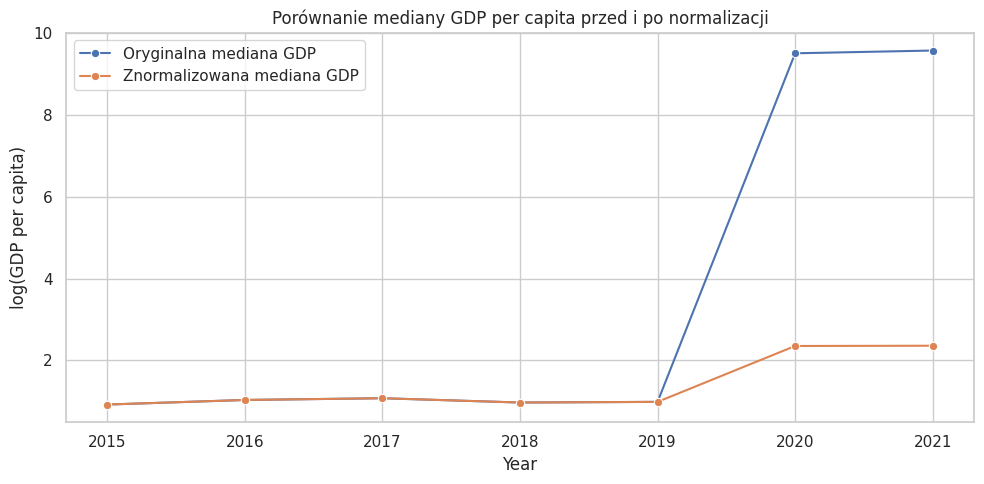

In [ ]:
# Create nową columnsę GDP_log_consistent w df_final_no2022 z uwzględnieniem różnic w latach
df["GDP_log_consistent"] = df.apply(
    lambda row: np.log1p(row["GDP per capita"]) if row["Year"] >= 2020 else row["GDP per capita"],
    axis=1
)

# Obliczamy medianę for każdej wersji GDP w podziale na rok
gdp_medians = df.groupby("Year")[["GDP per capita", "GDP_log_consistent"]].median().reset_index()

# Wykres porównawczy median w czasie
plt.figure(figsize=(10, 5))
sns.lineplot(data=gdp_medians, x="Year", y="GDP per capita", marker="o", label="Oryginalna mediana GDP")
sns.lineplot(data=gdp_medians, x="Year", y="GDP_log_consistent", marker="o", label="Znormalizowana mediana GDP")
plt.title("Porównanie median GDP per capita przed i po normalizacji")
plt.ylabel("log(GDP per capita)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

if "GDP_log_consistent" in df.columns:
    df = df.drop(columns=["GDP per capita"], errors="ignore")
    df["GDP per capita"] = df["GDP_log_consistent"]
    df = df.drop(columns=["GDP_log_consistent"])
# Potwierdzenie zmian
df.columns


Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'GDP per capita'],
      dtype='object')

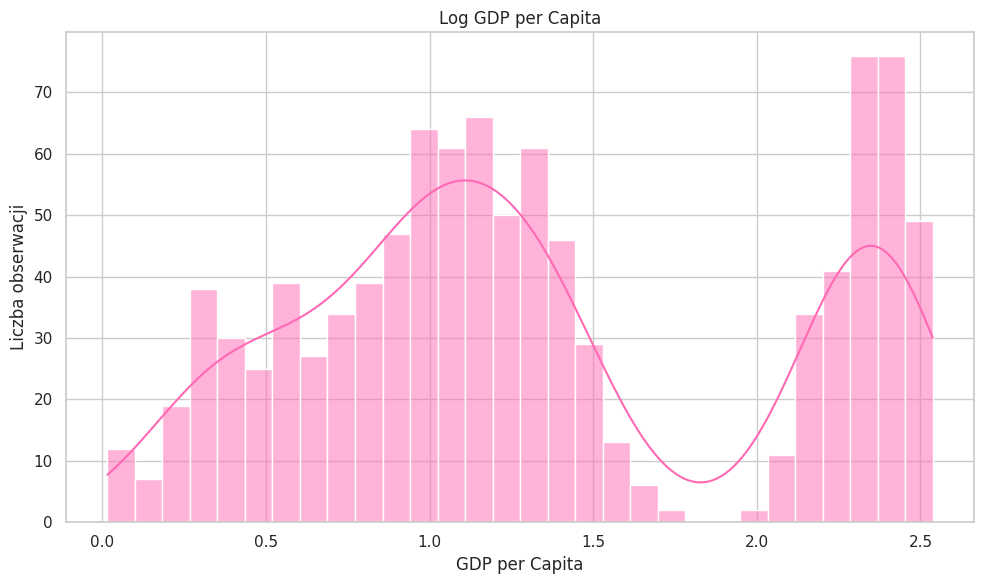

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["GDP per capita"], kde=True, bins=30, color="#FF69B4")
plt.title("Log GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()

### ❤️ Healthy Life Expectancy - Scale Correction

Some values are in 0-1 scale (normalized), others in years (0-100). We convert all values to a uniform scale (years).


In [ ]:
df["Healthy life expectancy"].describe()

,Healthy life expectancy
count,1004.000000
mean,19.090196
std,29.339900
min,0.000000
25%,0.582855
50%,0.790780
75%,56.097485
max,76.953000


In [ ]:
# Obserwacje poniżej 1
below_1 = df[df["Healthy life expectancy"] < 1]
num_below_1 = below_1.shape[0]
countries_below_1 = below_1[["Country", "Year", "Region", "Healthy life expectancy"]]

# Oczyszczenie danych (values większe lub równe 1)
df_cleaned = df[df["Healthy life expectancy"] >= 1]

# Kraje z najniższą i najwyższą valuesą po oczyszczeniu
min_hle = df_cleaned.nsmallest(5, "Healthy life expectancy")[["Country", "Year", "Region", "Healthy life expectancy"]]
max_hle = df_cleaned.nlargest(5, "Healthy life expectancy")[["Country", "Year", "Region", "Healthy life expectancy"]]


In [ ]:
# Automatyczne czyszczenie danych: values < 30 traktujemy jako brak danych (NaN)
df_cleaned_threshold = df.copy()
df_cleaned_threshold.loc[df_cleaned_threshold["Healthy life expectancy"] < 30, "Healthy life expectancy"] = pd.NA

# Sprawdzenie ile danych zostało usuniętych
num_cleaned = df.shape[0] - df_cleaned_threshold["Healthy life expectancy"].count()

# Displayenie kilku przykładów po czyszczeniu
sample_after_cleaning = df_cleaned_threshold[df_cleaned_threshold["Healthy life expectancy"].isna()].head()

num_cleaned, sample_after_cleaning


(np.int64(716),
    Year      Country                 Region  Happiness Rank  Happiness Score  \
 0  2015  Switzerland         Western Europe             1.0            7.587   
 1  2015      Iceland         Western Europe             2.0            7.561   
 2  2015      Denmark         Western Europe             3.0            7.527   
 3  2015       Norway         Western Europe             4.0            7.522   
 4  2015       Canada  North America and ANZ             5.0            7.427   
 
    Social support  Healthy life expectancy  Freedom to make life choices  \
 0         1.34951                      NaN                       0.66557   
 1         1.40223                      NaN                       0.62877   
 2         1.36058                      NaN                       0.64938   
 3         1.33095                      NaN                       0.66973   
 4         1.32261                      NaN                       0.63297   
 
    Generosity  Perceptions of c

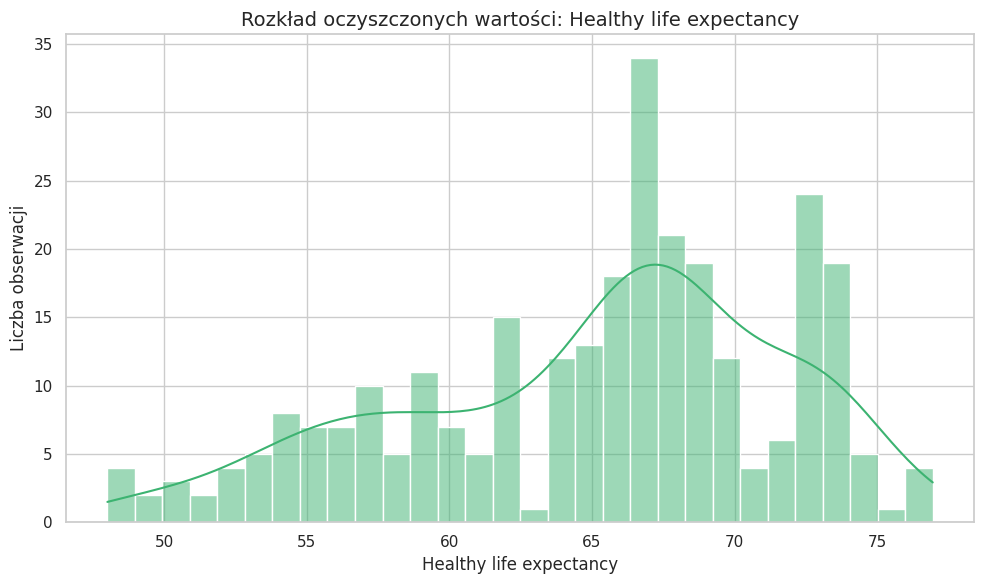

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_threshold["Healthy life expectancy"].dropna(), kde=True, bins=30, color="mediumseagreen")
plt.title("Rozkład oczyszczonych values: Healthy life expectancy", fontsize=14)
plt.xlabel("Healthy life expectancy")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()


### 🎁 Generosity - Outlier Winsorization

The Generosity variable contains extreme outliers. We apply winsorization (trimming 1% of most extreme values from both distribution tails).


In [ ]:
generosity_stats = df_final["Generosity"].describe(percentiles=[.01, .25, .5, .75, .99])
generosity_stats

,Generosity
count,1004.000000
mean,0.147727
std,0.168196
min,-0.300907
1%,-0.235846
25%,0.058307
50%,0.153000
75%,0.247251
99%,0.565125
max,0.838075


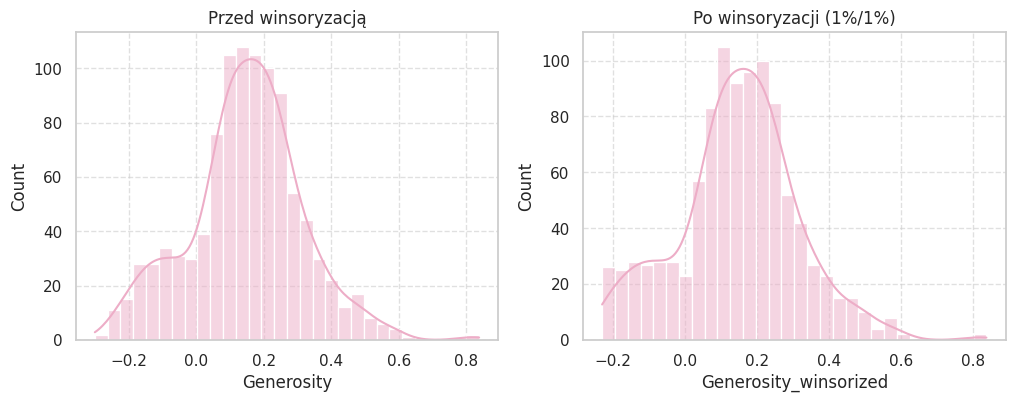

In [ ]:

# Winsoryzacja: przycinamy 1% values z lewej i prawej strony
generosity_winsorized = winsorize(df_final["Generosity"], limits=[0.01, 0.01])

# Dodajemy nową columnse do ramki danych
df_final["Generosity_winsorized"] = generosity_winsorized

# Dodajemy wizualizację przed i po winsoryzacji
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_final["Generosity"], bins=30, kde=True, color="#EDADC7", ax=axes[0])
axes[0].set_title("Przed winsoryzacją")
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.histplot(df_final["Generosity_winsorized"], bins=30, kde=True, color="#EDADC7", ax=axes[1])
axes[1].set_title("Po winsoryzacji (1%/1%)")
axes[1].grid(True, linestyle='--', alpha=0.6)


### 📊 Outlier Analysis - Remaining Variables

We identify outliers in remaining variables using the IQR (Interquartile Range) method.


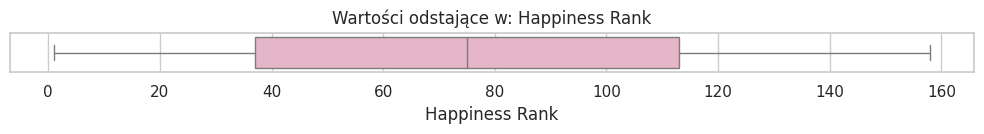

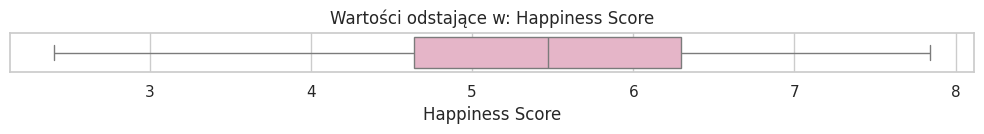

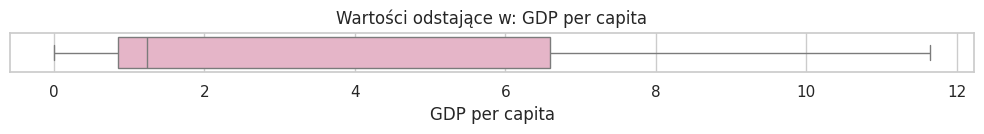

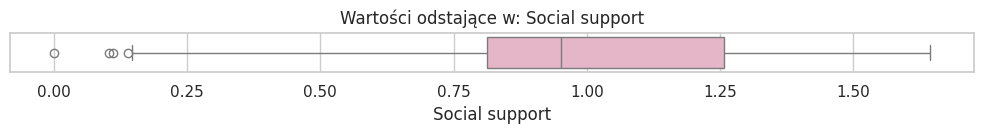

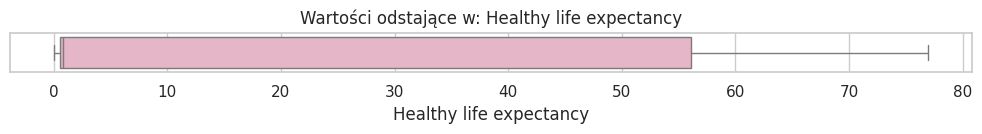

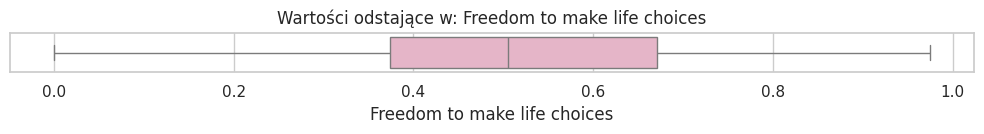

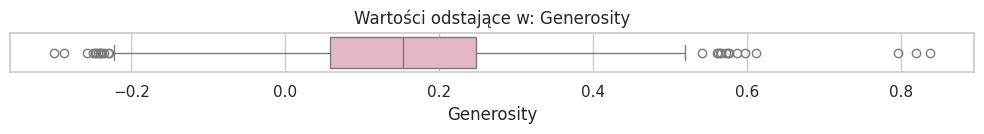

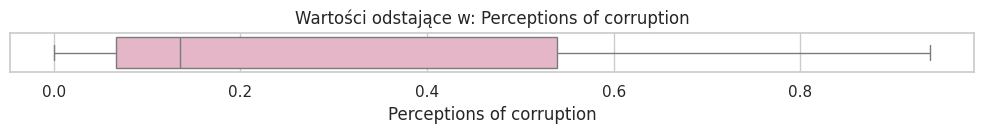

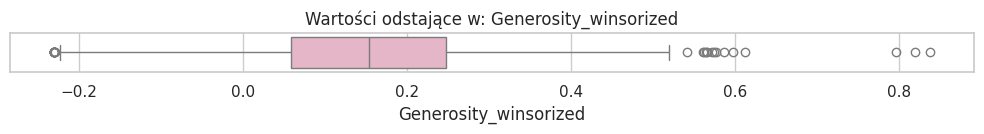

In [ ]:
numeric_columns = df_final.select_dtypes(include='number').columns.drop('Year') # Outliery

for col in numeric_columns: # Tworzenie wykresów boxplot (bez 'Year')
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(data=df_final, x=col, color="#EDADC7")
    plt.title(f'Wartości odstające w: {col}')
    plt.tight_layout()
    plt.show()

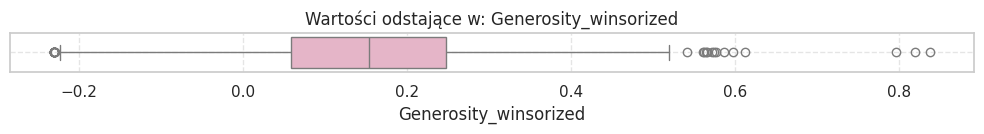

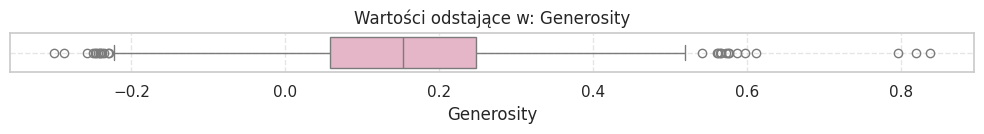

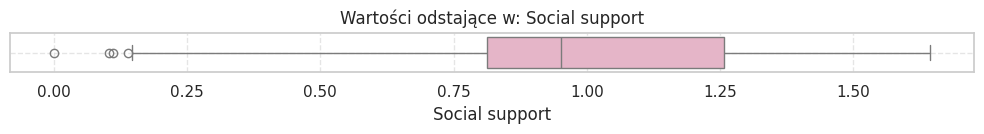

In [ ]:
#  Zdefiniowanie danych z analizy outlierów
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

# Potwierdzenie, że funkcja została załadowana
"Funkcja detect_outliers_iqr zdefiniowana."


outlier_summary = []

for col in numeric_columns:
    series = df_final[col].dropna()
    count, low, high = detect_outliers_iqr(series)
    outlier_summary.append({
        "Cecha": col,
        "Liczba outlierów": count,
        "Dół (min bezpieczny)": round(low, 3),
        "Góra (max bezpieczny)": round(high, 3),
        "Procent danych jako outliery": round(100 * count / len(series), 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Procent danych jako outliery", ascending=False)

# Teraz we select columns z outlierami
columns_with_outliers = outlier_df[outlier_df["Liczba outlierów"] > 0]["Cecha"].tolist()

# Tworzenie wykresów boxplot
for col in columns_with_outliers:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(data=df_final, x=col, color="#EDADC7")
    plt.title(f'Wartości odstające w: {col}')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


---

## 6. Exploratory Data Analysis and Visualizations

### 📊 Descriptive Statistics

Basic statistics for all numerical variables.


In [ ]:
# Statystyki opisowe for key variables
print('='*80)
print('DESCRIPTIVE STATISTICS')
print('='*80)
print(df[[col for col in df.columns if col not in ['Country', 'Region', 'Year']]].describe())


### 📈 Histograms - Variable Distributions

We visualize the distributions of key variables affecting the happiness index.


In [ ]:

cechy = [
    "Happiness Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

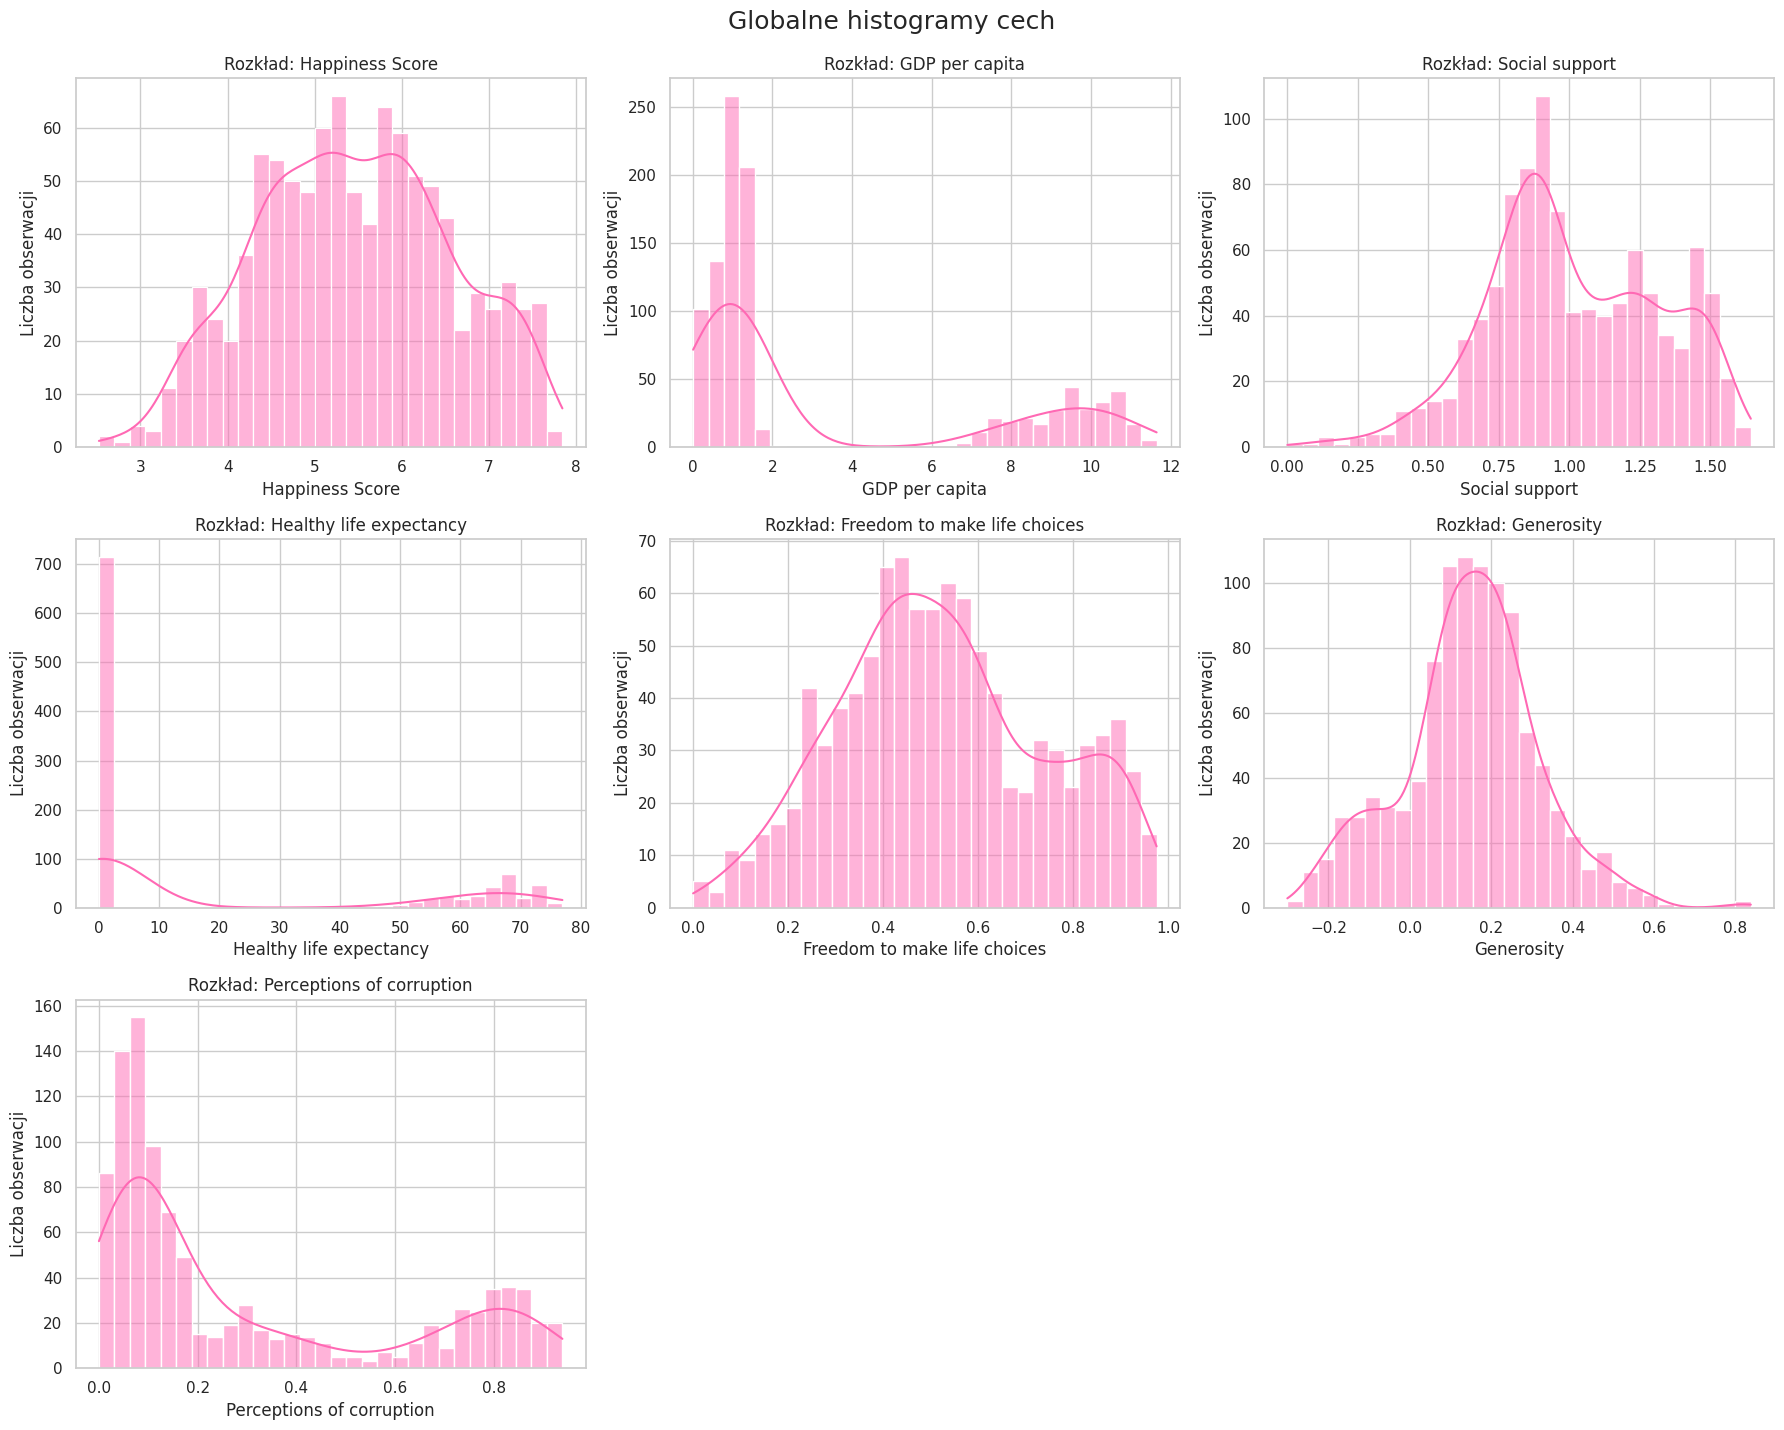

In [ ]:

plt.figure(figsize=(18, 14))

for i, cecha in enumerate(cechy, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[cecha], kde=True, bins=30, color="#FF69B4")
    plt.title(f"Rozkład: {cecha}")
    plt.xlabel(cecha)
    plt.ylabel("Liczba obserwacji")
    plt.tight_layout()

plt.suptitle("Globalne histogramy cech", fontsize=18, y=1.02)
plt.show()


### 🗺️ World Map - Happiness Score

Visualization of average happiness levels on a world map (choropleth).


In [ ]:
# 8) Mapa świata (choropleth) – średni poziom szczęścia

mean_scores = (
    df.groupby("Country")["Happiness Score"]
      .mean()
      .reset_index()
)

fig = px.choropleth(
    mean_scores,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    color_continuous_scale="Pinkyl",
    title="Średni (2015‑2021) Happiness Score – mapa świata"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


**Conclusions z mapy:**

- Happiest regions: Northern Europe, North America, Australia and New Zealand
- Lowest happiness levels: Sub-Saharan Africa and some Asian regions
- Clear geographical and cultural divisions


### 📊 Boxplot - Happiness Score by Region

Comparison of happiness levels across regions.


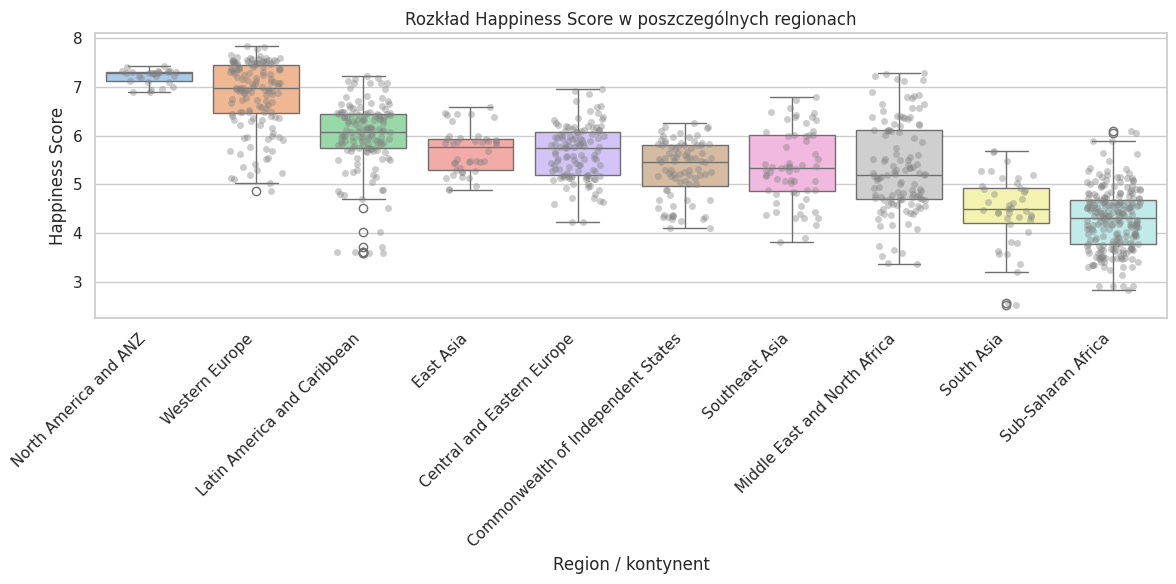

In [ ]:
# 6) Kolejność regionów by median Happiness Score (to make comparison easier)
median_by_region = (
    df.groupby("Region")["Happiness Score"]
      .median()
      .sort_values(ascending=False)
)
ordered_regions = median_by_region.index.tolist()

# (2) Boxplot + punkty for każdego kraju
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="Region",
    y="Happiness Score",
    order=ordered_regions,
    palette="pastel"
)
sns.stripplot(
    data=df,
    x="Region",
    y="Happiness Score",
    order=ordered_regions,
    color="gray",
    alpha=0.4,
    jitter=0.25
)

plt.title("Rozkład Happiness Score w poszczególnych regionach")
plt.xlabel("Region / kontynent")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 🔗 Correlation Matrix

We examine relationships between individual factors and happiness levels.


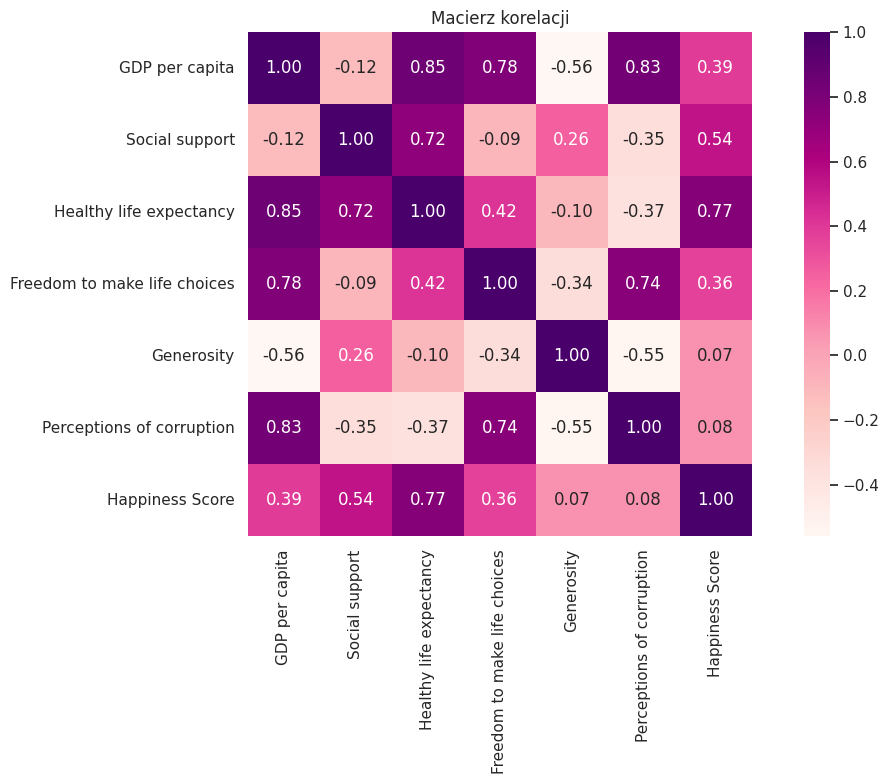

In [ ]:
# Wybór only columns do analizy korelacji
cols_corr = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Happiness Score']


# Obliczenie macierzy korelacji
correlation_matrix = df[cols_corr].corr()

# Wizualizacja
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdPu", square=True)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()



**Conclusions z korelacji:**

- **GDP per capita** has the strongest positive correlation with Happiness Score
- **Healthy life expectancy** i **Social support** also strongly correlate with happiness
- **Perceptions of corruption** negatively impacts happiness
- **Generosity** has the weakest correlation among studied factors


### 📈 Top 10 - Largest Happiness Score Changes

Countries with the largest increases and decreases in happiness levels during 2015-2021.


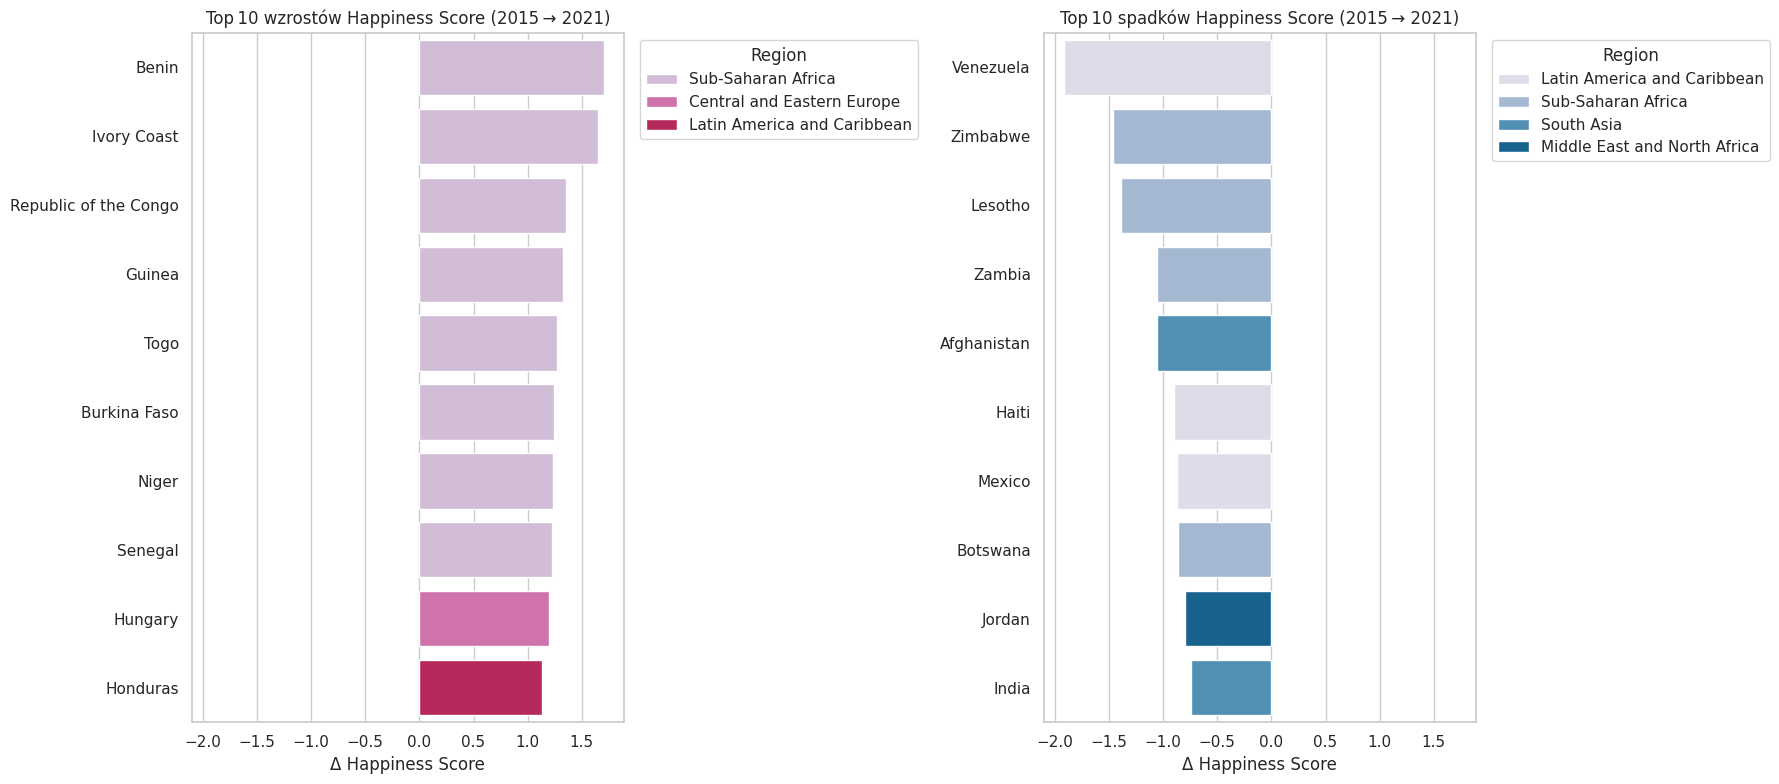

In [ ]:
# Obliczenie zakresu lat
first_year = df["Year"].min()
last_year = df["Year"].max()

# Pivot i obliczenie zmiany
pivot = (
    df.pivot(index="Country", columns="Year", values="Happiness Score")
      .dropna(subset=[first_year, last_year])
)
pivot["Delta"] = pivot[last_year] - pivot[first_year]

# Top 10 wzrostów i spadków
top10_inc = pivot.sort_values("Delta", ascending=False).head(10).reset_index()
top10_dec = pivot.sort_values("Delta", ascending=True).head(10).reset_index()

# Dołączenie regionu
region_df = df[["Country", "Region"]].drop_duplicates()
top10_inc = top10_inc.merge(region_df, on="Country", how="left")
top10_dec = top10_dec.merge(region_df, on="Country", how="left")

# Ustawienia stylu
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Wzrost
sns.barplot(
    data=top10_inc,
    y="Country",
    x="Delta",
    hue="Region",
    dodge=False,
    palette="PuRd",
    ax=axes[0]
)
axes[0].set_title(f"Top 10 wzrostów Happiness Score ({first_year} → {last_year})")
axes[0].set_xlabel("Δ Happiness Score")
axes[0].set_ylabel("")
axes[0].legend(title="Region", bbox_to_anchor=(1.02, 1), loc="upper left")

# Spadek
sns.barplot(
    data=top10_dec,
    y="Country",
    x="Delta",
    hue="Region",
    dodge=False,
    palette="PuBu",
    ax=axes[1]
)
axes[1].set_title(f"Top 10 spadków Happiness Score ({first_year} → {last_year})")
axes[1].set_xlabel("Δ Happiness Score")
axes[1].set_ylabel("")
axes[1].legend(title="Region", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


### 📊 Quartile Comparison

We compare countries from the highest (Q4) and lowest (Q1) Happiness Score quartile in terms of key factors.


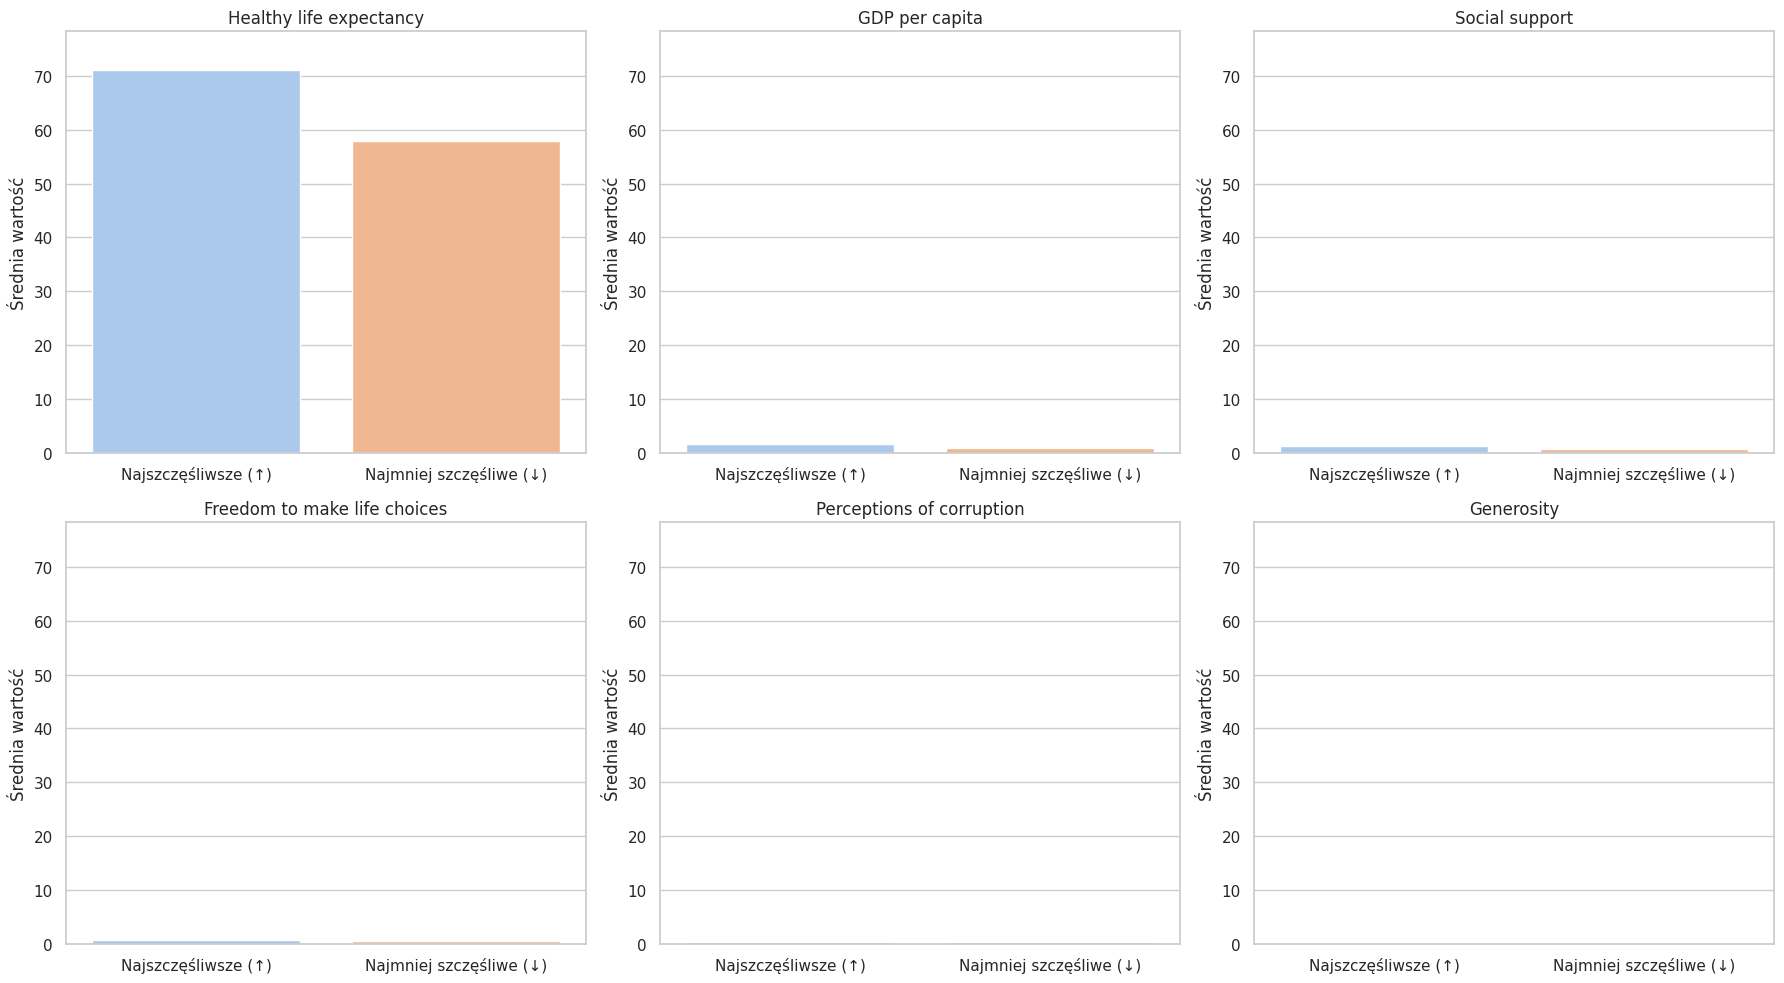

In [ ]:
# Lista predyktorów
PREDICTORS = [
    "Healthy life expectancy",
    "Social support",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "GDP per capita"
]

# Oblicz średnie values predyktorów w dwóch grupach
q75 = df["Happiness Score"].quantile(0.75)
q25 = df["Happiness Score"].quantile(0.25)

top = df[df["Happiness Score"] >= q75][PREDICTORS].mean()
bot = df[df["Happiness Score"] <= q25][PREDICTORS].mean()

# Różnica for sortowania
diff = (top - bot).abs()
sorted_features = diff.sort_values(ascending=False).index.tolist()

# Budowa tabeli for wykresu
config = (
    pd.DataFrame({"Najszczęśliwsze (↑)": top, "Najmniej szczęśliwe (↓)": bot})
    .loc[sorted_features]
    .reset_index()
    .rename(columns={"index": "Czynnik"})
    .melt(id_vars="Czynnik", var_name="Grupa", value_name="Średnia")
)

# Tworzenie osobnych wykresów for każdej cechy
num_features = config["Czynnik"].nunique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

palette = sns.color_palette("pastel")

for i, feature in enumerate(sorted_features):
    ax = axes[i]
    sns.barplot(
        data=config[config["Czynnik"] == feature],
        x="Grupa",
        y="Średnia",
        ax=ax,
        palette=palette
    )
    ax.set_title(feature)
    ax.set_ylabel("Średnia wartość")
    ax.set_xlabel("")
    ax.set_ylim(0, config["Średnia"].max() * 1.1)

plt.tight_layout()
plt.show()


In [ ]:
# Tabela z różnicami
summary_table = pd.DataFrame({
    "Top 25%": top,
    "Bottom 25%": bot,
    "Różnica": top - bot
}).sort_values("Różnica", ascending=False)



In [ ]:
summary_table

,Top 25%,Bottom 25%,Różnica
Healthy life expectancy,71.162592,57.877521,13.285070
GDP per capita,1.651035,0.895920,0.755115
Social support,1.201813,0.796603,0.405209
Freedom to make life choices,0.634697,0.434200,0.200497
Perceptions of corruption,0.323360,0.255625,0.067735
Generosity,0.197199,0.173188,0.024011


**Conclusions z porównania kwartylowego:**

- GDP per capita differs most between wealthiest and poorest countries
- Social support i Healthy life expectancy also show large disparities
- Freedom i Generosity have smaller differences between quartiles


### 🆓 Freedom to Make Life Choices - Regional Comparison

Boxplot showing freedom of life choice across different regions.


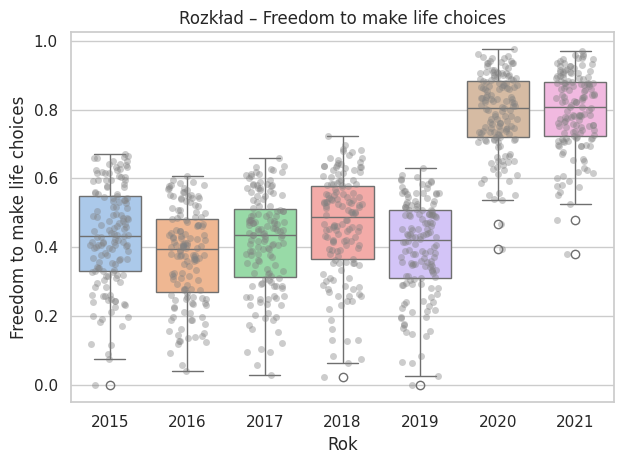

In [ ]:
# 7) Whiskers (boxplot) – Freedom to make life choices

plt.figure()
sns.boxplot(data=df, x="Year", y="Freedom to make life choices", palette="pastel")
sns.stripplot(data=df, x="Year", y="Freedom to make life choices",
              color="gray", alpha=0.4, jitter=0.25)
plt.title("Rozkład – Freedom to make life choices")
plt.xlabel("Rok")
plt.ylabel("Freedom to make life choices")
plt.tight_layout()
plt.subplots_adjust()

plt.show()

### 📉 Happiness Score Temporal Trend

How did average happiness levels change globally during 2015-2021?


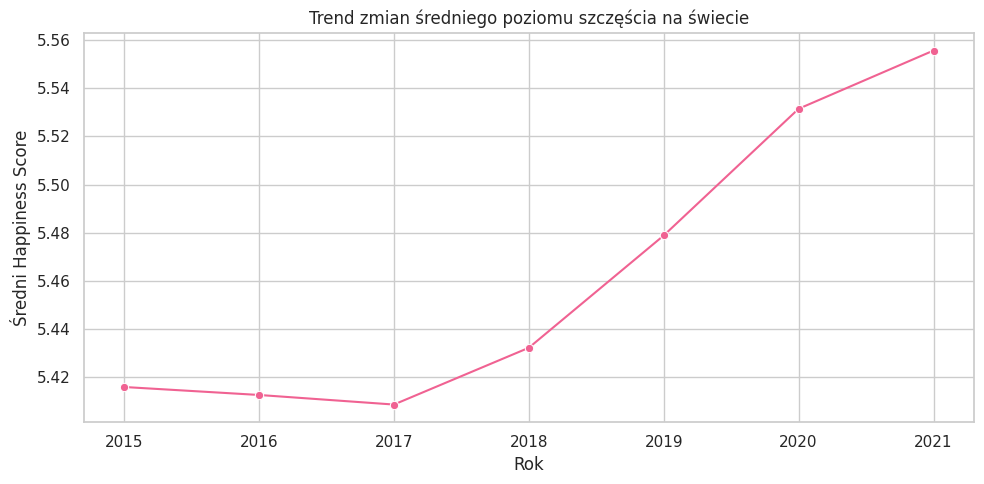

In [ ]:
#  5- Oblicz średni Happiness Score for each year
mean_by_year = (
    df.groupby("Year")["Happiness Score"]
    .mean()
    .reset_index()
)

# Liniowy wykres trendu
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=mean_by_year,
    x="Year",
    y="Happiness Score",
    marker="o",
    color="#f06292"
)

plt.title("Trend zmian średniego poziomu szczęścia na świecie")
plt.xlabel("Rok")
plt.ylabel("Średni Happiness Score")
plt.tight_layout()
plt.show()


### 🦠 COVID-19 Pandemic Impact

Analysis of happiness level changes across regions between 2019 and 2021 (pre and post-pandemic).


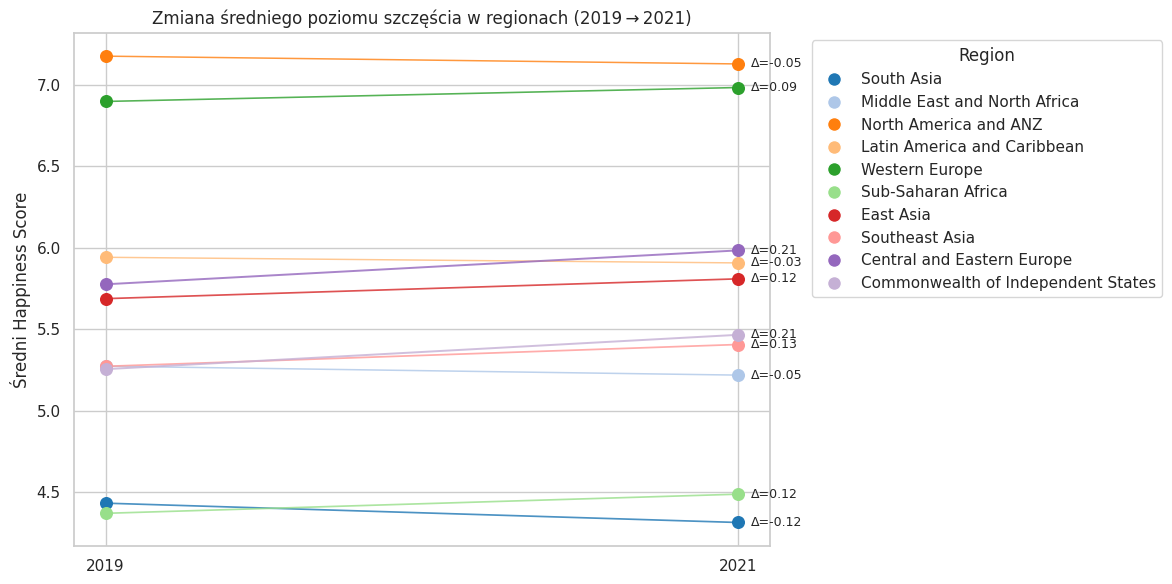

In [ ]:

# Data preparation
years = [2019, 2021]
df = df_final_no2022[df_final_no2022["Year"].isin(years)]

mean_by_region = (
    df.groupby(["Region", "Year"])["Happiness Score"]
      .mean()
      .unstack()
      .reset_index()
      .rename(columns={2019: "Score_2019", 2021: "Score_2021"})
)

mean_by_region["Delta"] = mean_by_region["Score_2021"] - mean_by_region["Score_2019"]
mean_by_region = mean_by_region.sort_values("Delta")

# Przygotowanie unikalnych, kontrastowych kolorów for regionów
unique_regions = mean_by_region["Region"].unique()
palette = sns.color_palette("tab20", len(unique_regions))
region_colors = dict(zip(unique_regions, palette))

# Wykres z valuesami Δ
plt.figure(figsize=(12, 6))
for idx, row in mean_by_region.iterrows():
    color = region_colors[row["Region"]]
    plt.plot([0, 1], [row["Score_2019"], row["Score_2021"]],
             color=color, linewidth=1 + abs(row["Delta"]) * 2, alpha=0.8)
    plt.scatter(0, row["Score_2019"], color=color, s=70, zorder=3)
    plt.scatter(1, row["Score_2021"], color=color, s=70, zorder=3)
    plt.text(1.02, row["Score_2021"], f"Δ={row['Delta']:.2f}",
             va="center", ha="left", fontsize=9)

# Oś x
plt.xticks([0, 1], ["2019", "2021"])
plt.xlabel("")
plt.ylabel("Średni Happiness Score")
plt.title("Zmiana średniego poziomu szczęścia w regionach (2019 → 2021)")

# Legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=region,
                      markerfacecolor=color, markersize=10)
           for region, color in region_colors.items()]
plt.legend(title="Region", handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Conclusions dotyczące pandemii:**

- The decline in global happiness in 2021 was not uniform
- Regions with higher development levels coped better with the crisis
- Most affected were regions with lower GDP per capita and weaker social support


---

## 7. Conclusions and Recommendations

### 🎯 Key Findings

1. **Happiest regions:** Northern Europe, North America, Australia and New Zealand
2. **Critical factors:** GDP per capita, Social support, Healthy life expectancy have the strongest impact
3. **Regional disparities:** Significant differences between developing and developed regions
4. **Temporal trend:** General increase in happiness levels during 2015-2019, decline in 2020-2021 (COVID-19)
5. **Wpływ pandemii:** Nierównomierny - developed countries coped better with the crisis

### 📌 Recommendations

1. **For Policy Makers:**
   - Investments in healthcare systems (Healthy life expectancy)
   - Strengthening social support networks
   - Reducing corruption and increasing transparency
   
2. **Further Research:**
   - Causal analysis (not just correlations)
   - Predictive models for happiness levels
   - Analysis of long-term pandemic effects
   - Comparison with other development indicators (HDI, Gini coefficient)

3. **Possible Project Extensions:**
   - Machine Learning: Happiness Score prediction
   - Country cluster analysis
   - Time series analysis with forecasting
   - Comparison with economic data (GDP, inflation, unemployment)

---

### 📚 References

- World Happiness Report: https://worldhappiness.report/
- Dane: https://www.kaggle.com/datasets/unsdsn/world-happiness
- Dokumentacja: https://worldhappiness.report/ed/2023/

---

## ✅ End of Analysis

**Project Team:**  
Joanna Mackiewicz, Krzysztof Lachs, Kinga Kaza  

**Date:** 2023/2024  
**Course:** Statistical Data Analysis  
